# Import LIBs

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from sklearn import preprocessing

In [4]:
from nltk.corpus import stopwords

In [5]:
from num2words import num2words

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
from sklearn.feature_extraction.text import TfidfTransformer

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
from sklearn import naive_bayes

In [10]:
from sklearn.metrics import roc_auc_score

In [11]:
import re

In [12]:
from nltk.stem.porter import *

In [13]:
from collections import Counter

In [14]:
le = preprocessing.LabelEncoder()

In [15]:
st = PorterStemmer()

In [16]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saaim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
from nltk.stem import WordNetLemmatizer 

In [18]:
import matplotlib.pyplot as plt

In [19]:
from xgboost import XGBRFClassifier

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [21]:
import sklearn
from sklearn.metrics import r2_score

In [22]:
from spellchecker import SpellChecker

In [23]:
from sklearn.metrics import mean_absolute_error

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.metrics import recall_score

from sklearn.metrics import precision_score

from sklearn.metrics import f1_score

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [25]:
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

In [26]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

In [27]:
# first neural network with keras tutorial
from numpy import loadtxt
#from keras.models import Sequential
#from keras.layers import Dense
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Conv1D, GlobalMaxPooling1D

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer

from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences

from numpy import array
from numpy import asarray
from numpy import zeros

from keras.layers.embeddings import Embedding

Using TensorFlow backend.


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline

In [29]:
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

In [30]:
from sklearn.svm import SVC

In [31]:
from tensorflow.keras.layers import LSTM

In [32]:
import matplotlib.pyplot as plt; plt.rcdefaults()

# Project Task: Week 1

## Class Imbalance Problem:

### Load data

In [33]:
td = pd.read_csv("train_data.csv")

In [34]:
td.shape

(4000, 8)

In [35]:
td_test_hidden = pd.read_csv("test_data_hidden.csv")

In [36]:
td_test = pd.read_csv("test_data.csv")

In [37]:
td.shape

(4000, 8)

In [38]:
td.head()

name   brand  \
0  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...  Amazon   
1        Amazon - Echo Plus w/ Built-In Hub - Silver  Amazon   
2  Amazon Echo Show Alexa-enabled Bluetooth Speak...  Amazon   
3  Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...  Amazon   
4  Brand New Amazon Kindle Fire 16gb 7" Ips Displ...  Amazon   

                                          categories  \
0  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  Amazon Echo,Smart Home,Networking,Home & Tools...   
2  Amazon Echo,Virtual Assistant Speakers,Electro...   
3  eBook Readers,Fire Tablets,Electronics Feature...   
4  Computers/Tablets & Networking,Tablets & eBook...   

             primaryCategories              reviews.date  \
0                  Electronics  2016-12-26T00:00:00.000Z   
1         Electronics,Hardware  2018-01-17T00:00:00.000Z   
2         Electronics,Hardware  2017-12-20T00:00:00.000Z   
3  Office Supplies,Electronics  2017-08-04T00:00:00.000Z   
4                  Electronics  2017-01-23T00:00:00.000Z   

                                        reviews.text  \
0  Purchased on Black FridayPros - Great Price (e...   
1  I purchased two Amazon in Echo Plus and two do...   
2  Just an average Alexa option. Does show a few ...   
3  very good product. Exactly what I wanted, and ...   
4  This is the 3rd one I've purchased. I've bough...   

              reviews.title sentiment  
0           Powerful tablet  Positive  
1  Amazon Echo Plus AWESOME  Positive  
2                   Average   Neutral  
3               Greattttttt  Positive  
4             Very durable!  Positive

In [39]:
print("Max Sentence length: " + str(td['reviews.text'].map(len).max()))
print("Max no of Words: " + str(td['reviews.text'].str.split().apply(len).value_counts().max()))

Max Sentence length: 8351
Max no of Words: 242


In [40]:
td.describe()

name   brand  \
count                                                4000    4000   
unique                                                 23       1   
top     Amazon Echo Show Alexa-enabled Bluetooth Speak...  Amazon   
freq                                                  676    4000   

                                               categories primaryCategories  \
count                                                4000              4000   
unique                                                 23                 4   
top     Electronics,iPad & Tablets,All Tablets,Fire Ta...       Electronics   
freq                                                  628              2600   

                    reviews.date  \
count                       4000   
unique                       638   
top     2017-01-23T00:00:00.000Z   
freq                          99   

                                             reviews.text reviews.title  \
count                                                4000          3990   
unique                                               3598          2606   
top     Got this for my Daughter-in-Law and she loves ...  Great tablet   
freq                                                    4           100   

       sentiment  
count       4000  
unique         3  
top     Positive  
freq        3749

### EDA

In [41]:
td = td.drop(['brand'], axis=1)
td_test = td_test.drop(['brand'], axis=1)
td_test_hidden = td_test_hidden.drop(['brand'], axis=1)

In [42]:
td = td.drop(['reviews.date'], axis=1)
td_test = td_test.drop(['reviews.date'], axis=1)
td_test_hidden = td_test_hidden.drop(['reviews.date'], axis=1)

In [43]:
td.dtypes

name                 object
categories           object
primaryCategories    object
reviews.text         object
reviews.title        object
sentiment            object
dtype: object

In [44]:
td_test_hidden.dtypes

name                 object
categories           object
primaryCategories    object
reviews.text         object
reviews.title        object
sentiment            object
dtype: object

In [45]:
td_test.dtypes

name                 object
categories           object
primaryCategories    object
reviews.text         object
reviews.title        object
dtype: object

In [46]:
td[td.isnull().any(axis=1)]

name  \
834   Amazon Echo Show Alexa-enabled Bluetooth Speak...   
1268  Amazon Echo Show Alexa-enabled Bluetooth Speak...   
1695  Amazon Echo Show Alexa-enabled Bluetooth Speak...   
1824  Amazon Echo Show Alexa-enabled Bluetooth Speak...   
2786  Amazon Fire TV with 4K Ultra HD and Alexa Voic...   
2822  Amazon Echo Show Alexa-enabled Bluetooth Speak...   
2933  Amazon Echo Show Alexa-enabled Bluetooth Speak...   
3103  Amazon Echo Show Alexa-enabled Bluetooth Speak...   
3224  Amazon Echo Show Alexa-enabled Bluetooth Speak...   
3690  Amazon Echo Show Alexa-enabled Bluetooth Speak...   

                                             categories     primaryCategories  \
834   Computers,Amazon Echo,Virtual Assistant Speake...  Electronics,Hardware   
1268  Amazon Echo,Virtual Assistant Speakers,Electro...  Electronics,Hardware   
1695  Computers,Amazon Echo,Virtual Assistant Speake...  Electronics,Hardware   
1824  Computers,Amazon Echo,Virtual Assistant Speake...  Electronics,Hardware   
2786  Amazon SMP,TV, Video & Home Audio,Electronics,...           Electronics   
2822  Computers,Amazon Echo,Virtual Assistant Speake...  Electronics,Hardware   
2933  Amazon Echo,Virtual Assistant Speakers,Electro...  Electronics,Hardware   
3103  Amazon Echo,Virtual Assistant Speakers,Electro...  Electronics,Hardware   
3224  Computers,Amazon Echo,Virtual Assistant Speake...  Electronics,Hardware   
3690  Computers,Amazon Echo,Virtual Assistant Speake...  Electronics,Hardware   

                                           reviews.text reviews.title  \
834   Best New Adult Toy in years! Wish I had purcha...           NaN   
1268  Best New Adult Toy in years! Wish I had purcha...           NaN   
1695  I bought the echo show for my mom for her birt...           NaN   
1824  this is pretty cool, we love ours, we listen t...           NaN   
2786  Really cool device! Instantly noticed the diff...           NaN   
2822  I love the Echo show. I have found so many use...           NaN   
2933  Awesome so far. Have used it as alarm clock, s...           NaN   
3103  This was bought for a gift. But it looks nice....           NaN   
3224  Delivered on time and it looked good will hook...           NaN   
3690  This was bought for a gift. But it looks nice....           NaN   

     sentiment  
834   Positive  
1268  Positive  
1695  Positive  
1824  Positive  
2786  Positive  
2822  Positive  
2933  Positive  
3103  Positive  
3224  Positive  
3690  Positive

In [47]:
td.isna().sum()

name                  0
categories            0
primaryCategories     0
reviews.text          0
reviews.title        10
sentiment             0
dtype: int64

In [48]:
td.loc[td['reviews.title'].isnull(), 'reviews.title'] = "Positive"

In [49]:
td.isna().sum()

name                 0
categories           0
primaryCategories    0
reviews.text         0
reviews.title        0
sentiment            0
dtype: int64

In [50]:
td_test_hidden[td_test_hidden.isnull().any(axis=1)]

name  \
222  Amazon Echo Show Alexa-enabled Bluetooth Speak...   
366  Amazon Echo Show Alexa-enabled Bluetooth Speak...   
570  Amazon Echo Show Alexa-enabled Bluetooth Speak...   

                                            categories     primaryCategories  \
222  Amazon Echo,Virtual Assistant Speakers,Electro...  Electronics,Hardware   
366  Computers,Amazon Echo,Virtual Assistant Speake...  Electronics,Hardware   
570  Computers,Amazon Echo,Virtual Assistant Speake...  Electronics,Hardware   

                                          reviews.text reviews.title sentiment  
222  Absolutely Love the echo Show! It is in my kit...           NaN  Positive  
366  Its a lot more then we expected.this is a wond...           NaN  Positive  
570  I love it. It does so much and is so easy to u...           NaN  Positive

In [51]:
td_test_hidden.isna().sum()

name                 0
categories           0
primaryCategories    0
reviews.text         0
reviews.title        3
sentiment            0
dtype: int64

In [52]:
td_test_hidden.loc[td_test_hidden['reviews.title'].isnull(), 'reviews.title'] = "Positive"

In [53]:
td_test[td_test.isnull().any(axis=1)]

name  \
222  Amazon Echo Show Alexa-enabled Bluetooth Speak...   
366  Amazon Echo Show Alexa-enabled Bluetooth Speak...   
570  Amazon Echo Show Alexa-enabled Bluetooth Speak...   

                                            categories     primaryCategories  \
222  Amazon Echo,Virtual Assistant Speakers,Electro...  Electronics,Hardware   
366  Computers,Amazon Echo,Virtual Assistant Speake...  Electronics,Hardware   
570  Computers,Amazon Echo,Virtual Assistant Speake...  Electronics,Hardware   

                                          reviews.text reviews.title  
222  Absolutely Love the echo Show! It is in my kit...           NaN  
366  Its a lot more then we expected.this is a wond...           NaN  
570  I love it. It does so much and is so easy to u...           NaN

In [54]:
td_test.isna().sum()

name                 0
categories           0
primaryCategories    0
reviews.text         0
reviews.title        3
dtype: int64

In [55]:
td_test.loc[td_test['reviews.title'].isnull(), 'reviews.title'] = "Positive"

In [56]:
td.describe()

name  \
count                                                4000   
unique                                                 23   
top     Amazon Echo Show Alexa-enabled Bluetooth Speak...   
freq                                                  676   

                                               categories primaryCategories  \
count                                                4000              4000   
unique                                                 23                 4   
top     Electronics,iPad & Tablets,All Tablets,Fire Ta...       Electronics   
freq                                                  628              2600   

                                             reviews.text reviews.title  \
count                                                4000          4000   
unique                                               3598          2607   
top     Got this for my Daughter-in-Law and she loves ...  Great tablet   
freq                                                    4           100   

       sentiment  
count       4000  
unique         3  
top     Positive  
freq        3749

In [57]:
td_test_hidden.describe()

name  \
count                                                1000   
unique                                                 23   
top     All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...   
freq                                                  169   

                                               categories primaryCategories  \
count                                                1000              1000   
unique                                                 23                 4   
top     Electronics,iPad & Tablets,All Tablets,Fire Ta...       Electronics   
freq                                                  169               676   

                                             reviews.text reviews.title  \
count                                                1000          1000   
unique                                                979           797   
top     Got this tablet for my 7yr old daughter and it...  Great tablet   
freq                                                    2            22   

       sentiment  
count       1000  
unique         3  
top     Positive  
freq         937

In [58]:
td_test.describe()

name  \
count                                                1000   
unique                                                 23   
top     All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...   
freq                                                  169   

                                               categories primaryCategories  \
count                                                1000              1000   
unique                                                 23                 4   
top     Electronics,iPad & Tablets,All Tablets,Fire Ta...       Electronics   
freq                                                  169               676   

                                             reviews.text reviews.title  
count                                                1000          1000  
unique                                                979           797  
top     Got this tablet for my 7yr old daughter and it...  Great tablet  
freq                                                    2            22

In [59]:
td.shape

(4000, 6)

In [60]:
td_test_hidden.shape

(1000, 6)

In [61]:
td_test.shape

(1000, 5)

In [62]:
hist = td.groupby('sentiment').agg(['count'])
hist_test_hidden = td_test_hidden.groupby('sentiment').agg(['count'])

In [63]:
hist

name categories primaryCategories reviews.text reviews.title
          count      count             count        count         count
sentiment                                                              
Negative     93         93                93           93            93
Neutral     158        158               158          158           158
Positive   3749       3749              3749         3749          3749

In [64]:
hist_test_hidden

name categories primaryCategories reviews.text reviews.title
          count      count             count        count         count
sentiment                                                              
Negative     24         24                24           24            24
Neutral      39         39                39           39            39
Positive    937        937               937          937           937

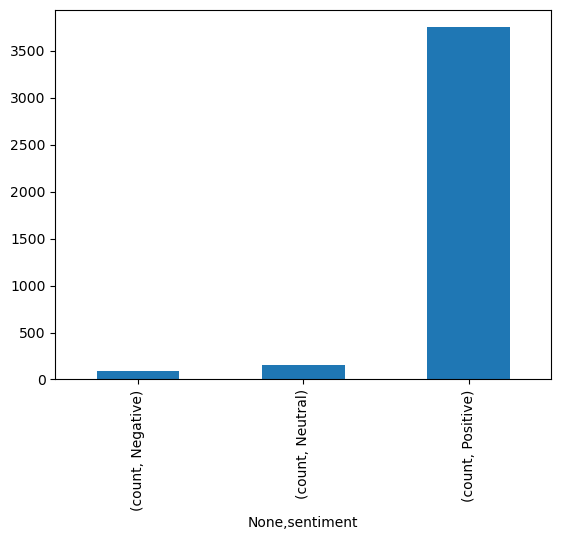

In [65]:
hist['name'].unstack().plot.bar(stacked=True)

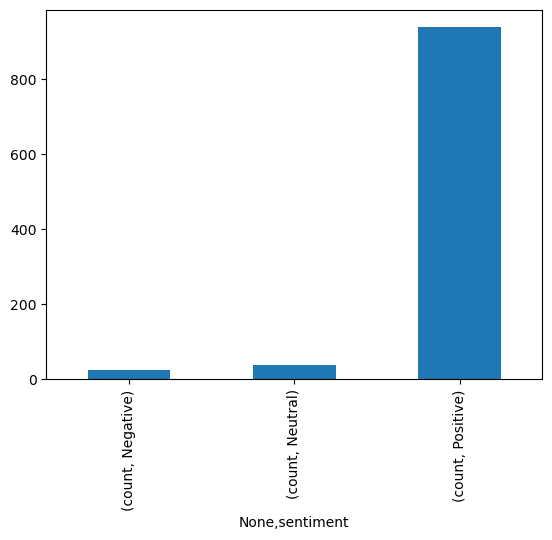

In [66]:
hist_test_hidden['name'].unstack().plot.bar(stacked=True)

#### Label encoding

In [67]:
def LableEncode(col):
    le.fit(col)
    list(le.classes_)
    return le.transform(col)

In [68]:
td['sentiment'] = LableEncode(td['sentiment'])
td_test_hidden['sentiment'] = LableEncode(td_test_hidden['sentiment'])

In [69]:
td.head()

name  \
0  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...   
1        Amazon - Echo Plus w/ Built-In Hub - Silver   
2  Amazon Echo Show Alexa-enabled Bluetooth Speak...   
3  Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...   
4  Brand New Amazon Kindle Fire 16gb 7" Ips Displ...   

                                          categories  \
0  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  Amazon Echo,Smart Home,Networking,Home & Tools...   
2  Amazon Echo,Virtual Assistant Speakers,Electro...   
3  eBook Readers,Fire Tablets,Electronics Feature...   
4  Computers/Tablets & Networking,Tablets & eBook...   

             primaryCategories  \
0                  Electronics   
1         Electronics,Hardware   
2         Electronics,Hardware   
3  Office Supplies,Electronics   
4                  Electronics   

                                        reviews.text  \
0  Purchased on Black FridayPros - Great Price (e...   
1  I purchased two Amazon in Echo Plus and two do...   
2  Just an average Alexa option. Does show a few ...   
3  very good product. Exactly what I wanted, and ...   
4  This is the 3rd one I've purchased. I've bough...   

              reviews.title  sentiment  
0           Powerful tablet          2  
1  Amazon Echo Plus AWESOME          2  
2                   Average          1  
3               Greattttttt          2  
4             Very durable!          2

In [70]:
td_test_hidden.head()

name  \
0  Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...   
1  Amazon Echo Show Alexa-enabled Bluetooth Speak...   
2  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...   
3  Brand New Amazon Kindle Fire 16gb 7" Ips Displ...   
4  Amazon Echo Show Alexa-enabled Bluetooth Speak...   

                                          categories     primaryCategories  \
0  Fire Tablets,Computers/Tablets & Networking,Ta...           Electronics   
1  Computers,Amazon Echo,Virtual Assistant Speake...  Electronics,Hardware   
2  Electronics,iPad & Tablets,All Tablets,Fire Ta...           Electronics   
3  Computers/Tablets & Networking,Tablets & eBook...           Electronics   
4  Computers,Amazon Echo,Virtual Assistant Speake...  Electronics,Hardware   

                                        reviews.text  \
0  Amazon kindle fire has a lot of free app and c...   
1  The Echo Show is a great addition to the Amazo...   
2  Great value from Best Buy. Bought at Christmas...   
3  I use mine for email, Facebook ,games and to g...   
4  This is a fantastic item & the person I bought...   

                       reviews.title  sentiment  
0                  very handy device          2  
1         Another winner from Amazon          2  
2  simple to use and reliable so far          2  
3                         Love it!!!          2  
4                         Fantastic!          2

#### Remove Stopwords

In [71]:
def removeStopWord(col, debug=False):
    StopWordRemove = []
    
    print("\n------------Main Stop Words Remove-------------\n")

    for obs in col:
        if debug : print("\n------------Start--------------\n" + obs)
        new_text = ""
        for word in obs.split():
            if word not in stop_words:
                if len(word) > 1:
                    new_text = new_text + " " + word
        if debug : print("\n---\n" + new_text + "\n--------------End--------------\n\n")
        StopWordRemove.append(new_text)
    return StopWordRemove
    #col = pd.Series(StopWordRemove, index=td.index)

#### Remove punctuation

In [72]:
def removePunc(col, debug=False):
    puncRemove = []
    symbols = "\'!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n\,\‚"
    
    print("\n------------Main Punc Remove-------------\n")
    
    for obs in col:
        if debug : print("\n------------Start--------------\n" + obs)
        for i in symbols:
            #print(i)
            #obs = np.char.replace(obs, i, ' ')
            obs = obs.replace(i, ' ')
        obs = str(obs).replace("  ", " ")
        if debug : print("\n---\n" + obs + "\n--------------End--------------\n\n")
        puncRemove.append(str(obs))
    return puncRemove
    #col = pd.Series(puncRemove, index=td.index)

#### Remove Simgle character

In [73]:
def  removeSingleChar(col, debug=False):
    SingleChar = []
    
    print("\n------------Main Single Char Remove-------------\n")

    for obs in col:
        if debug : print("\n------------Start--------------\n" + obs)
        new_text = ""
        for word in obs.split():
            if len(word) > 1:
                new_text = new_text + " " + word
                
        if debug : print("\n---\n" + new_text + "\n--------------End--------------\n\n")
        SingleChar.append(new_text)
    return SingleChar
    #col = pd.Series(SingleChar, index=td.index)

#### Lemmatize

In [74]:
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

def lemma(col, debug=False):
    lemmatizeList = []

    print("\n------------Main lemmatizer-------------\n")
        
    for obs in col:
        if debug : print("\n------------Start--------------\n" + obs)
        new_text = ""
        for word in obs.split():
            new_text = new_text + " " + lemmatizer.lemmatize(word)
            
        if debug : print("\n---\n" + new_text + "\n--------------End--------------\n\n")
        lemmatizeList.append(new_text)
    return lemmatizeList

#### Number to Words

In [75]:
def numberToWord(col, debug=False):
    Num2Word = []
    
    print("\n------------Main Number To Word-------------\n")
    for obs in col:
        if debug : print("\n------------Start--------------\n" + obs)
        new_text = ""
        for word in obs.split():
            if re.findall("^/d+$", word): 
                new_text = new_text + " " + num2words(word)    
            else:
                new_text = new_text + " " + word  
        if debug : print("\n---\n" + new_text + "\n--------------End--------------\n\n")
        Num2Word.append(new_text)
    return Num2Word
    #td['reviews.title'] = pd.Series(Num2Word, index=td.index)

#### SpellChecker

In [76]:
spell = SpellChecker()
totalSpellErrors = []
def spellCheck(col, debug=False):
    spellCheckList = []
    
    print("\n------------Main Spellcheck-------------\n")
    for obs in col:
        if debug : print("\n------------Start--------------\n" + obs)
        new_text = ""
        missSpellWords = spell.unknown(obs.split())
        totalSpellErrors.extend(missSpellWords)
        for word in obs.split():
            if debug : print('-'*50)
            if debug : print(word)
            if word in missSpellWords:
                if debug : print('-'*50)
                if debug : print("Unknown: "+word)
                if debug : print(spell.correction(word))
                if debug : print(spell.candidates(word))
                new_text = new_text + " " + spell.correction(word)
            else:
                new_text = new_text + " " + word  
        if debug : print("\n---\n" + new_text + "\n--------------End--------------\n\n")
        spellCheckList.append(new_text)
    return spellCheckList
    #td['reviews.title'] = pd.Series(Num2Word, index=td.index)

#### Clear words list

In [77]:
wordList = [("product",""), ("alex",""), ("kindle",""), ("tablet",""), ("  ", " "), ("grandads", "grand ads"), ("goodexcellent", "good excellent"), ("greattttttt", "great"),  ("greatôºå", "great"), ("everydayuse", "every day use"), ("pricegood", "price good"),  ("soooooo", "so"), ("loooooove", "love"), ("reallllllllllllllllllllllllllllllllllllllllllllllly", "really"), ("portablebility", "portable"),  ("availablesare", "available"),  ("perfectsound", "perfect sound"),  ("	toddlerseasy", "toddlers easy"),  ("carryeasy", "carry easy"),  ("kitchenalso", "kitchen also"),  ("interfaceneeds", "interface needs"),  ("bloaaattted", "bloated"),  ("usefuland", "useful and"),  ("ereaderfor", "ereader for"),  ("anyreader", "any reader"),  ("areagreat", "area great"),  ("wantedbest", "wanted best"),  ("satisfiedeasier", "satisfied easier"),  ("grrrrrrreeeeeeeeaaaaaattttttt", "great"),  ("speedcons", "speed cons")]

def wordListReplace(col, debug=False):
    wordListReplaceList = []
    
    print("\n------------Main Word List Remove-------------\n")
    
    if debug : print("\n------------Start--------------\n" + obs)
    for obs in col:
        for item in wordList:
            obs = obs.replace(item[0], item[1])
        wordListReplaceList.append(str(obs))
    if debug : print("\n---\n" + obs + "\n--------------End--------------\n\n")
    return wordListReplaceList

#### Make words unique

In [78]:
def wordListUnique(col, debug=False):
    wordListReplaceList = []
    
    print("\n------------Main Word List unique-------------\n")
    
    if debug : print("\n------------Start--------------\n" + obs)
    for obs in col:        
        wordListReplaceList.append(" ".join(list(set(obs.split()))))
    if debug : print("\n---\n" + obs + "\n--------------End--------------\n\n")
    return wordListReplaceList

#### Remove nouns

In [79]:
def wordListNotNoun(col, debug=False):
    wordListNotNoun = []
    
    print("\n------------Main remove nouns-------------\n")
    
    if debug : print("\n------------Start--------------\n" + obs)
    for obs in col:     
        collection = ""
        for word, tag in nltk.pos_tag(obs.split()):            
            if tag != 'NNP':                
                collection = collection + " " +word
            else:
                if debug : print (word + " :: " + tag)
        wordListNotNoun.append(collection)
    if debug : print("\n---\n" + obs + "\n--------------End--------------\n\n")
    return wordListNotNoun

#### Call all the cleanup functions

In [80]:
def CleanComment(col, debug=False):
    col = col.str.lower()
    col = removePunc(col, debug)
    col = wordListUnique(col, debug)    
    col = removeSingleChar(col, debug)
    col = removeStopWord(col, debug)
    col = wordListReplace(col, debug)
    col = numberToWord(col, debug)
    col = lemma(col, debug)
    col = spellCheck(col, debug)
    col = wordListNotNoun(col, debug)
    return col

In [81]:
print("td-reviews.text")
td['reviews.text'] = CleanComment(td['reviews.text'], False)
print("td-reviews.title")
td['reviews.title'] = CleanComment(td['reviews.title'], False)
print("td_test_hidden-reviews.text")
td_test_hidden['reviews.text'] = CleanComment(td_test_hidden['reviews.text'], False)
print("td_test_hidden-reviews.title")
td_test_hidden['reviews.title'] = CleanComment(td_test_hidden['reviews.title'], False)
print("td_test-reviews.text")
td_test['reviews.text'] = CleanComment(td_test['reviews.text'], False)
print("td_test-reviews.title")
td_test['reviews.title'] = CleanComment(td_test['reviews.title'], False)

#print(totalSpellErrors)

td-reviews.text

------------Main Punc Remove-------------


------------Main Word List unique-------------


------------Main Single Char Remove-------------


------------Main Stop Words Remove-------------


------------Main Word List Remove-------------


------------Main Number To Word-------------


------------Main lemmatizer-------------


------------Main Spellcheck-------------


------------Main remove nouns-------------

td-reviews.title

------------Main Punc Remove-------------


------------Main Word List unique-------------


------------Main Single Char Remove-------------


------------Main Stop Words Remove-------------


------------Main Word List Remove-------------


------------Main Number To Word-------------


------------Main lemmatizer-------------


------------Main Spellcheck-------------


------------Main remove nouns-------------

td_test_hidden-reviews.text

------------Main Punc Remove-------------


------------Main Word List unique-------------


---

#### Mearge the title and text as one collumn as Document

In [82]:
td['document'] = td['reviews.text'] + td['reviews.title']

In [83]:
print("Max Sentence length: " + str(td['document'].map(len).max()))
print("Max no of Words: " + str(td['document'].str.split().apply(len).value_counts().max()))

Max Sentence length: 2686
Max no of Words: 367


In [84]:
td_test_hidden['document'] = td_test_hidden['reviews.text'] + td_test_hidden['reviews.title']

In [85]:
print("Max Sentence length: " + str(td_test_hidden['document'].map(len).max()))
print("Max no of Words: " + str(td_test_hidden['document'].str.split().apply(len).value_counts().max()))

Max Sentence length: 2686
Max no of Words: 95


In [86]:
td_test['document'] = td_test['reviews.text'] + td_test['reviews.title']

In [87]:
print("Max Sentence length: " + str(td_test['document'].map(len).max()))
print("Max no of Words: " + str(td_test['document'].str.split().apply(len).value_counts().max()))

Max Sentence length: 2686
Max no of Words: 95


In [88]:
td

name  \
0     All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...   
1           Amazon - Echo Plus w/ Built-In Hub - Silver   
2     Amazon Echo Show Alexa-enabled Bluetooth Speak...   
3     Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...   
4     Brand New Amazon Kindle Fire 16gb 7" Ips Displ...   
...                                                 ...   
3995        Amazon - Echo Plus w/ Built-In Hub - Silver   
3996  Amazon Kindle E-Reader 6" Wifi (8th Generation...   
3997  Amazon Tap - Alexa-Enabled Portable Bluetooth ...   
3998  Brand New Amazon Kindle Fire 16gb 7" Ips Displ...   
3999  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...   

                                             categories  \
0     Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1     Amazon Echo,Smart Home,Networking,Home & Tools...   
2     Amazon Echo,Virtual Assistant Speakers,Electro...   
3     eBook Readers,Fire Tablets,Electronics Feature...   
4     Computers/Tablets & Networking,Tablets & eBook...   
...                                                 ...   
3995  Amazon Echo,Smart Home,Networking,Home & Tools...   
3996  Computers,Electronics Features,Tablets,Electro...   
3997  Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...   
3998  Computers/Tablets & Networking,Tablets & eBook...   
3999  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                primaryCategories  \
0                     Electronics   
1            Electronics,Hardware   
2            Electronics,Hardware   
3     Office Supplies,Electronics   
4                     Electronics   
...                           ...   
3995         Electronics,Hardware   
3996                  Electronics   
3997                  Electronics   
3998                  Electronics   
3999                  Electronics   

                                           reviews.text  \
0      builtcons great goole amazon inability southw...   
1      horoscope best purchased recipe lamp him also...   
2      show average screen option a still thing limited   
3                             good exactly wanted price   
4      niece one held purchased dropping protected t...   
...                                                 ...   
3995   all play fun get see family wear is boring ne...   
3996   strain great reading reduces love second eye ...   
3997   sound cable month solves ordered last account...   
3998   fire like amazon black purchased met second c...   
3999                           fast satisfied efficient   

                  reviews.title  sentiment  \
0                      powerful          2   
1      echo awesome amazon plus          2   
2                       average          1   
3                         great          2   
4                       durable          2   
...                         ...        ...   
3995                    fun toy          2   
3996                      great          2   
3997         dumb speaker great          2   
3998           inch great price          2   
3999               job get done          2   

                                               document  
0      builtcons great goole amazon inability southw...  
1      horoscope best purchased recipe lamp him also...  
2      show average screen option a still thing limi...  
3                       good exactly wanted price great  
4      niece one held purchased dropping protected t...  
...                                                 ...  
3995   all play fun get see family wear is boring ne...  
3996   strain great reading reduces love second eye ...  
3997   sound cable month solves ordered last account...  
3998   fire like amazon black purchased met second c...  
3999              fast satisfied efficient job get done  

[4000 rows x 7 columns]

## Vectorize

In [89]:
sentences = td['document']
cvec = CountVectorizer(stop_words='english', min_df=1, max_df=0.5, ngram_range=(1,2))
sf = cvec.fit_transform(sentences)

#### Canculate Weights

In [90]:
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

In [91]:
weights_df.sort_values(by='weight', ascending=False).head(10)

term    weight
18653    love  0.029302
12984    good  0.018674
32624     use  0.018510
9183     easy  0.018083
16388     kid  0.017487
3825   bought  0.013825
24006   price  0.013587
9465     echo  0.013572
1334   amazon  0.012748
34678    work  0.012705

In [92]:
weights_df.set_index("term", inplace = True)

In [93]:
weights_df.head()

weight
term                   
00             0.000162
00 affordable  0.000067
00 ask         0.000045
00 costly      0.000064
10             0.001740

In [94]:
result = weights_df.transpose() 

In [95]:
result

term          00  00 affordable    00 ask  00 costly       10     10 10  \
weight  0.000162       0.000067  0.000045   0.000064  0.00174  0.000061   

term      10 age  10 answer   10 apps  10 birthday  ...  zero camping  \
weight  0.000135   0.000062  0.000095     0.000068  ...      0.000038   

term    zero replace    ziggie  ziggie plus     zippy  zippy giving      zone  \
weight      0.000054  0.000056     0.000056  0.000022      0.000022  0.000051   

term    zone installed      zoom  zoom little  
weight        0.000051  0.000049     0.000049  

[1 rows x 35398 columns]

In [96]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

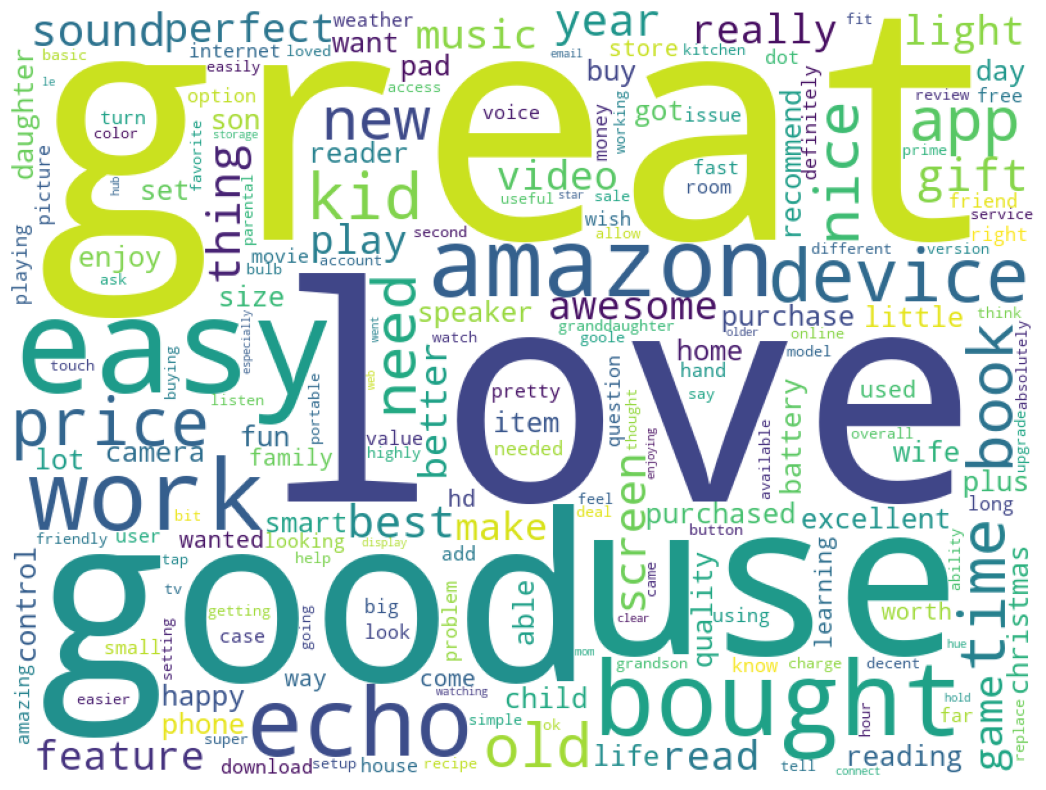

In [97]:
cloud(' '.join(result))
# remove the unwanted word

In [98]:
#stopwords = stopwords.words('english')

In [99]:
vectorizer = TfidfVectorizer(use_idf=True, strip_accents='ascii')

In [100]:
#vectorizer = CountVectorizer()

In [101]:
y = td.sentiment

In [102]:
y_test_hidden = td_test_hidden.sentiment

In [103]:
y_test_hidden.shape

(1000,)

In [104]:
X = vectorizer.fit_transform(td.document)

In [105]:
X.shape

(4000, 4098)

In [106]:
X_test_hidden = vectorizer.transform(td_test_hidden.document)

In [107]:
X_test_hidden.shape

(1000, 4098)

In [108]:
X_test = vectorizer.transform(td_test.document)

In [109]:
y.shape

(4000,)

In [110]:
X.shape

(4000, 4098)

## Model building MultinomialNB

In [111]:
clf = naive_bayes.MultinomialNB()

In [112]:
clf.fit(X, y)

MultinomialNB()

In [113]:
clf.score(X, y)

0.93725

In [114]:
X.shape

(4000, 4098)

In [115]:
X_test.shape

(1000, 4098)

In [116]:
y_pred = clf.predict(X_test)

In [117]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

##### Inference

As we can see all the observations are calssified as positive. The reason is the data is inballance and bios (Positive is 96%).

In [118]:
hist_test_hidden

name categories primaryCategories reviews.text reviews.title
          count      count             count        count         count
sentiment                                                              
Negative     24         24                24           24            24
Neutral      39         39                39           39            39
Positive    937        937               937          937           937

# Project Task: Week 2

## Tackling Class Imbalance Problem

In [119]:
print(X)

  (0, 863)	0.2053673533092726
  (0, 74)	0.10908638618101349
  (0, 14)	0.18736663157655628
  (0, 95)	0.22336807504198897
  (0, 273)	0.09706046160352548
  (0, 3496)	0.22336807504198897
  (0, 1394)	0.12365921864990942
  (0, 3964)	0.11953659410866323
  (0, 2748)	0.0823704015340369
  (0, 115)	0.1610958091215385
  (0, 2715)	0.3456673205701169
  (0, 2975)	0.18157169352254537
  (0, 2380)	0.09787525947980878
  (0, 1522)	0.22336807504198897
  (0, 2472)	0.0792105798997755
  (0, 1287)	0.11417409151872006
  (0, 2577)	0.15483293855234212
  (0, 122)	0.2635801442222143
  (0, 2835)	0.2053673533092726
  (0, 2824)	0.09746466512482449
  (0, 2774)	0.16779151557653985
  (0, 209)	0.11953659410866323
  (0, 84)	0.13256534018926674
  (0, 1309)	0.16630713717744544
  (0, 3466)	0.1995724152552617
  :	:
  (3997, 2104)	0.07277078755783399
  (3997, 3866)	0.05867442030712207
  (3997, 3941)	0.09882513243802436
  (3997, 211)	0.06719587055888437
  (3997, 1642)	0.07722643897945615
  (3998, 3150)	0.30878334497695453
  (399

In [120]:
print(y)

0       2
1       2
2       1
3       2
4       2
       ..
3995    2
3996    2
3997    2
3998    2
3999    2
Name: sentiment, Length: 4000, dtype: int32


In [121]:
print (Counter(y))

Counter({2: 3749, 1: 158, 0: 93})


In [122]:
sklearn.metrics.r2_score(y_test_hidden, y_pred)

-0.05939685006003215

In [123]:
mean_absolute_error(y_test_hidden, y_pred)

0.087

In [124]:
mean_squared_error(y_test_hidden, y_pred)

0.135

In [125]:
# Confusion Matrix
confusion_matrix(y_test_hidden, y_pred)

array([[  0,   0,  24],
       [  0,   0,  39],
       [  0,   0, 937]], dtype=int64)

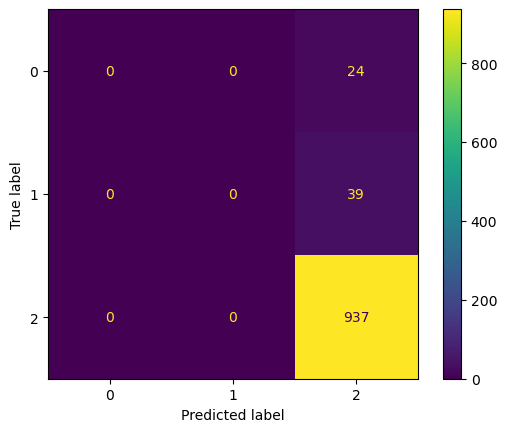

In [126]:
plot_confusion_matrix(clf, X_test, y_test_hidden)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

In [127]:
# Accuracy
accuracy_score(y_test_hidden, y_pred)

0.937

In [128]:
# Recall
recall = recall_score(y_test_hidden, y_pred, average=None)
recall

array([0., 0., 1.])

In [129]:
# Precision
precision = precision_score(y_test_hidden, y_pred, average=None)
precision

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.   , 0.   , 0.937])

In [130]:
precision = 0.937

# Method 1: sklearn

In [131]:
f1_score(y_test_hidden, y_pred, average=None)
# Method 2: Manual Calculation
F1 = 2 * (precision * recall) / (precision + recall)
# Method 3: BONUS - classification report
print(classification_report(y_test_hidden, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        39
           2       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
y_pred_proba = clf.predict_proba(X_test)
roc_auc_score(y_test_hidden, y_pred_proba, multi_class="ovo")

0.7530717237227376

In [133]:
roc_auc_score(y_test_hidden, y_pred_proba, multi_class="ovr")

0.8385369578753616

# Model function

In [134]:
ModelName = []
OverAll_accuracy = []
OverAll_precision = []
OverAll_recall = []
OverAll_f1 = []   
    
def MLmodel(name, splits, X, Y, X_h, y_h, pipeline, average_method):
       
    kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=777)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    
    accuracy_h = []
    precision_h = []
    recall_h = []
    f1_h = []
    
    for train, test in kfold.split(X, Y):
        lr_fit = pipeline.fit(X[train], Y[train])
        prediction = lr_fit.predict(X[test])
        
        scores = lr_fit.score(X[test],Y[test])
        
        print('-'*50)
        print("Train/Test Data")
        print('-'*50)
        
        accuracy.append(scores * 100)
        
        precision.append(precision_score(Y[test], prediction, average=average_method)*100)
        print('              negative    neutral     positive')
        print('precision:',precision_score(Y[test], prediction, average=None))
        recall.append(recall_score(Y[test], prediction, average=average_method)*100)
        print('recall:   ',recall_score(Y[test], prediction, average=None))
        f1.append(f1_score(Y[test], prediction, average=average_method)*100)
        print('f1 score: ',f1_score(Y[test], prediction, average=None))
        print('-'*50)
        print("Hidden Sample")
        print('-'*50)
        prediction_h = lr_fit.predict(X_h)
        scores_h = lr_fit.score(X_h,y_h)      
        
        accuracy_h.append(scores_h * 100)
        precision_h.append(precision_score(y_h, prediction_h, average=average_method)*100)
        print('              negative    neutral     positive')
        print('precision:',precision_score(y_h, prediction_h, average=None))
        recall_h.append(recall_score(y_h, prediction_h, average=average_method)*100)
        print('recall:   ',recall_score(y_h, prediction_h, average=None))
        f1_h.append(f1_score(y_h, prediction_h, average=average_method)*100)
        print('f1 score: ',f1_score(y_h, prediction_h, average=None))
        print('-'*50)
        
    print('-'*50)
    print("Consolidated Train/Test Sample")
    print('-'*50)
    print("accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(accuracy), np.std(accuracy)))
    print("precision: %.2f%% (+/- %.2f%%)" % (np.mean(precision), np.std(precision)))
    print("recall: %.2f%% (+/- %.2f%%)" % (np.mean(recall), np.std(recall)))
    print("f1 score: %.2f%% (+/- %.2f%%)" % (np.mean(f1), np.std(f1)))
    
    ModelName.append("Train: " + name)
    OverAll_accuracy.append(np.mean(accuracy_h))
    OverAll_precision.append(np.mean(precision))
    OverAll_recall.append(np.mean(recall))
    OverAll_f1.append(np.mean(f1))  
    
    print('-'*50)
    print("Consolidated Hidden Sample for testing")
    print('-'*50)
    print("accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(accuracy_h), np.std(accuracy_h)))
    print("precision: %.2f%% (+/- %.2f%%)" % (np.mean(precision_h), np.std(precision_h)))
    print("recall: %.2f%% (+/- %.2f%%)" % (np.mean(recall_h), np.std(recall_h)))
    print("f1 score: %.2f%% (+/- %.2f%%)" % (np.mean(f1_h), np.std(f1_h)))
    
    ModelName.append("Test: " + name)
    OverAll_accuracy.append(np.mean(accuracy_h))
    OverAll_precision.append(np.mean(precision))
    OverAll_recall.append(np.mean(recall))
    OverAll_f1.append(np.mean(f1))    

## Naive bayes MultinomialNB - RandomOverSampler

In [135]:
ROS_pipeline = make_pipeline(RandomOverSampler(random_state=777), naive_bayes.MultinomialNB())

In [136]:
MLmodel("MNB-ROS", 5, X, y, X_test_hidden, y_test_hidden, ROS_pipeline, 'macro')

--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [0.36363636 0.23076923 0.97578348]
recall:    [0.66666667 0.46875    0.91333333]
f1 score:  [0.47058824 0.30927835 0.94352617]
--------------------------------------------------
Hidden Sample
--------------------------------------------------
              negative    neutral     positive
precision: [0.34210526 0.18181818 0.97288136]
recall:    [0.54166667 0.35897436 0.91889007]
f1 score:  [0.41935484 0.24137931 0.94511526]
--------------------------------------------------
--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [0.34615385 0.24137931 0.96787709]
recall:    [0.5    0.4375 0.924 ]
f1 score:  [0.40909091 0.31111111 0.94542974]
--------------------------------------------------
Hid

## Naive bayes MultinomialNB - SMOTE - over

In [137]:
steps_over = [('over', SMOTE()), ('model', naive_bayes.MultinomialNB())]
pipeline_over = Pipeline(steps=steps_over)

In [138]:
MLmodel("MNB-SMOTE-O", 5, X, y,  X_test_hidden, y_test_hidden, pipeline_over, 'macro')

--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [0.32432432 0.20547945 0.97536232]
recall:    [0.66666667 0.46875    0.89733333]
f1 score:  [0.43636364 0.28571429 0.93472222]
--------------------------------------------------
Hidden Sample
--------------------------------------------------
              negative    neutral     positive
precision: [0.35135135 0.18292683 0.97275823]
recall:    [0.54166667 0.38461538 0.91462113]
f1 score:  [0.42622951 0.24793388 0.94279428]
--------------------------------------------------
--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [0.30769231 0.234375   0.97042254]
recall:    [0.44444444 0.46875    0.91866667]
f1 score:  [0.36363636 0.3125     0.94383562]
------------------------------------------

## Naive bayes MultinomialNB - SMOTE - Under

In [139]:
steps_over = [('under', SMOTE()), ('model', naive_bayes.MultinomialNB())]
pipeline_over = Pipeline(steps=steps_over)

In [140]:
MLmodel("MNB-SMOTE-U", 5, X, y,  X_test_hidden, y_test_hidden, pipeline_over, 'macro')

--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [0.33333333 0.2238806  0.97560976]
recall:    [0.66666667 0.46875    0.90666667]
f1 score:  [0.44444444 0.3030303  0.9398756 ]
--------------------------------------------------
Hidden Sample
--------------------------------------------------
              negative    neutral     positive
precision: [0.35135135 0.1875     0.97395243]
recall:    [0.54166667 0.38461538 0.91782284]
f1 score:  [0.42622951 0.25210084 0.94505495]
--------------------------------------------------
--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [0.34615385 0.23809524 0.96905767]
recall:    [0.5        0.46875    0.91866667]
f1 score:  [0.40909091 0.31578947 0.9431896 ]
------------------------------------------

## LogisticRegression - RandomOverSampler

In [141]:
ROS_pipeline = make_pipeline(RandomOverSampler(random_state=777), LogisticRegression())

In [142]:
MLmodel("RL-ROS", 5, X, y, X_test_hidden, y_test_hidden, ROS_pipeline, 'macro')

--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [0.64705882 0.34883721 0.97297297]
recall:    [0.61111111 0.46875    0.96      ]
f1 score:  [0.62857143 0.4        0.96644295]
--------------------------------------------------
Hidden Sample
--------------------------------------------------
              negative    neutral     positive
precision: [0.47619048 0.29310345 0.97285559]
recall:    [0.41666667 0.43589744 0.95624333]
f1 score:  [0.44444444 0.35051546 0.96447793]
--------------------------------------------------
--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [0.58333333 0.37931034 0.96179183]
recall:    [0.38888889 0.34375    0.97333333]
f1 score:  [0.46666667 0.36065574 0.96752816]
------------------------------------------

## LogisticRegression - SMOTE

In [143]:
SMOTE_pipeline = make_pipeline(SMOTE(random_state=777), LogisticRegression())

In [144]:
MLmodel("RL-SMOTE", 5, X, y, X_test_hidden, y_test_hidden, SMOTE_pipeline, 'macro')

--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [0.64705882 0.35714286 0.97300945]
recall:    [0.61111111 0.46875    0.96133333]
f1 score:  [0.62857143 0.40540541 0.96713615]
--------------------------------------------------
Hidden Sample
--------------------------------------------------
              negative    neutral     positive
precision: [0.5        0.29090909 0.97291441]
recall:    [0.45833333 0.41025641 0.9583778 ]
f1 score:  [0.47826087 0.34042553 0.9655914 ]
--------------------------------------------------
--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [0.58333333 0.37931034 0.96179183]
recall:    [0.38888889 0.34375    0.97333333]
f1 score:  [0.46666667 0.36065574 0.96752816]
------------------------------------------

## Random Forest Classifier - SMOTE over

In [145]:
# define pipeline oversampleing
steps_over = [('over', SMOTE()), ('model', RandomForestClassifier())]
pipeline_over = Pipeline(steps=steps_over)

In [146]:
MLmodel("RF-SMOTE-O", 5, X, y,  X_test_hidden, y_test_hidden, pipeline_over, 'macro')

--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [1.         1.         0.94936709]
recall:    [0.22222222 0.1875     1.        ]
f1 score:  [0.36363636 0.31578947 0.97402597]
--------------------------------------------------
Hidden Sample
--------------------------------------------------
              negative    neutral     positive
precision: [1.         0.9        0.95218718]
recall:    [0.29166667 0.23076923 0.99893276]
f1 score:  [0.4516129  0.36734694 0.975     ]
--------------------------------------------------
--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [1.         0.8        0.94690265]
recall:    [0.22222222 0.125      0.99866667]
f1 score:  [0.36363636 0.21621622 0.97209604]
------------------------------------------

## Random Forest Classifier - SMOTE under

In [147]:
# define pipeline oversampleing
steps_under = [('under', SMOTE()), ('model', RandomForestClassifier())]
pipeline_under = Pipeline(steps=steps_under)

In [148]:
MLmodel("RF-SMOTE-U", 5, X, y,  X_test_hidden, y_test_hidden, pipeline_under, 'macro')

--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [1.         0.875      0.95177665]
recall:    [0.22222222 0.21875    1.        ]
f1 score:  [0.36363636 0.35       0.97529259]
--------------------------------------------------
Hidden Sample
--------------------------------------------------
              negative    neutral     positive
precision: [1.         1.         0.95223577]
recall:    [0.29166667 0.23076923 1.        ]
f1 score:  [0.4516129  0.375      0.97553358]
--------------------------------------------------
--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [1.         0.85714286 0.94930292]
recall:    [0.22222222 0.1875     0.99866667]
f1 score:  [0.36363636 0.30769231 0.97335932]
------------------------------------------

## XGBoost Classifier - SMOTE under

In [149]:
# define pipeline oversampleing
steps_under = [('under', SMOTE()), ('model', OneVsRestClassifier(XGBClassifier()))]
pipeline_XGB_under = Pipeline(steps=steps_under)

In [150]:
MLmodel("XGB-SMOTE-U-OVR", 5, X, y,  X_test_hidden, y_test_hidden, pipeline_XGB_under, 'macro')

--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [0.8       0.5       0.9609375]
recall:    [0.44444444 0.34375    0.984     ]
f1 score:  [0.57142857 0.40740741 0.97233202]
--------------------------------------------------
Hidden Sample
--------------------------------------------------
              negative    neutral     positive
precision: [0.64285714 0.33333333 0.9590766 ]
recall:    [0.375      0.28205128 0.97545358]
f1 score:  [0.47368421 0.30555556 0.96719577]
--------------------------------------------------
--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [0.44444444 0.47058824 0.95478036]
recall:    [0.22222222 0.25       0.98533333]
f1 score:  [0.2962963  0.32653061 0.96981627]
---------------------------------------------

## XGBoost Classifier - SMOTE over

In [151]:
# define pipeline oversampleing
steps_under = [('over', SMOTE()), ('model', OneVsRestClassifier(XGBClassifier()))]
pipeline_XGB_over = Pipeline(steps=steps_under)

In [152]:
MLmodel("XGB-SMOTE-O-OVR", 5, X, y,  X_test_hidden, y_test_hidden, pipeline_XGB_over, 'macro')

--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [0.8        0.47826087 0.96219035]
recall:    [0.44444444 0.34375    0.984     ]
f1 score:  [0.57142857 0.4        0.97297297]
--------------------------------------------------
Hidden Sample
--------------------------------------------------
              negative    neutral     positive
precision: [0.69230769 0.34375    0.96020942]
recall:    [0.375      0.28205128 0.97865528]
f1 score:  [0.48648649 0.30985915 0.96934461]
--------------------------------------------------
--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [0.5        0.38888889 0.95219638]
recall:    [0.22222222 0.21875    0.98266667]
f1 score:  [0.30769231 0.28       0.9671916 ]
------------------------------------------

## XGBoost Classifier - SMOTE under

In [153]:
# define pipeline oversampleing
steps_under = [('under', SMOTE()), ('model', OneVsOneClassifier(XGBClassifier()))]
pipeline_XGB = Pipeline(steps=steps_under)

In [154]:
MLmodel("XGB-SMOTE-U-OVO", 5, X, y,  X_test_hidden, y_test_hidden, pipeline_XGB_over, 'macro')

--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [0.77777778 0.5        0.95979248]
recall:    [0.38888889 0.3125     0.98666667]
f1 score:  [0.51851852 0.38461538 0.97304405]
--------------------------------------------------
Hidden Sample
--------------------------------------------------
              negative    neutral     positive
precision: [0.64285714 0.35483871 0.95811518]
recall:    [0.375      0.28205128 0.97652081]
f1 score:  [0.47368421 0.31428571 0.96723044]
--------------------------------------------------
--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [0.44444444 0.42105263 0.95595855]
recall:    [0.22222222 0.25       0.984     ]
f1 score:  [0.2962963  0.31372549 0.96977661]
------------------------------------------

## OneVsOneClassifier XGBClassifier - SMOTE Over

In [155]:
# define pipeline oversampleing
steps_under = [('over', SMOTE()), ('model', OneVsOneClassifier(XGBClassifier()))]
pipeline_XGB_over = Pipeline(steps=steps_under)

In [156]:
MLmodel("XGB-SMOTE-O-OVO", 5, X, y,  X_test_hidden, y_test_hidden, pipeline_XGB_over, 'macro')

--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [0.63636364 0.45833333 0.96078431]
recall:    [0.38888889 0.34375    0.98      ]
f1 score:  [0.48275862 0.39285714 0.97029703]
--------------------------------------------------
Hidden Sample
--------------------------------------------------
              negative    neutral     positive
precision: [0.57142857 0.40740741 0.95724713]
recall:    [0.33333333 0.28205128 0.97972252]
f1 score:  [0.42105263 0.33333333 0.96835443]
--------------------------------------------------
--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [0.33333333 0.44444444 0.95584416]
recall:    [0.22222222 0.25       0.98133333]
f1 score:  [0.26666667 0.32       0.96842105]
------------------------------------------

### XGBoost Random Forest for Classification - Under - OVO

In [157]:
# define pipeline oversampleing
steps_under = [('over', SMOTE()), ('model', OneVsOneClassifier(XGBRFClassifier(n_estimators=100, subsample=0.9)))]
pipeline_XGBRF_over = Pipeline(steps=steps_under)

In [158]:
MLmodel("XGBRF-SMOTE-O-OVO", 5, X, y, X_test_hidden, y_test_hidden, pipeline_XGBRF_over, 'macro')

--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [0.27272727 0.23076923 0.95534506]
recall:    [0.33333333 0.28125    0.94133333]
f1 score:  [0.3        0.25352113 0.94828744]
--------------------------------------------------
Hidden Sample
--------------------------------------------------
              negative    neutral     positive
precision: [0.10810811 0.175      0.95124594]
recall:    [0.16666667 0.17948718 0.93703308]
f1 score:  [0.13114754 0.17721519 0.94408602]
--------------------------------------------------
--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [0.07142857 0.225      0.96845426]
recall:    [0.5        0.28125    0.81866667]
f1 score:  [0.125      0.25       0.88728324]
------------------------------------------

In [159]:
### XGBoost Random Forest for Classification - Under - OVO

In [160]:
# define pipeline oversampleing
steps_under = [('under', SMOTE()), ('model', OneVsOneClassifier(XGBRFClassifier(n_estimators=100, subsample=0.9)))]
pipeline_XGBRF_over = Pipeline(steps=steps_under)

In [161]:
MLmodel("XGBRF-SMOTE-U-OVO", 5, X, y, X_test_hidden, y_test_hidden, pipeline_XGBRF_over, 'macro')

--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [0.25       0.23404255 0.96159122]
recall:    [0.33333333 0.34375    0.93466667]
f1 score:  [0.28571429 0.27848101 0.9479378 ]
--------------------------------------------------
Hidden Sample
--------------------------------------------------
              negative    neutral     positive
precision: [0.17142857 0.17647059 0.95514223]
recall:    [0.25       0.23076923 0.93169691]
f1 score:  [0.20338983 0.2        0.94327391]
--------------------------------------------------
--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [0.0729927  0.20454545 0.96930533]
recall:    [0.55555556 0.28125    0.8       ]
f1 score:  [0.12903226 0.23684211 0.87655223]
------------------------------------------

In [162]:
### XGBoost Random Forest for Classification - Over - OVR

In [163]:
# define pipeline oversampleing
steps_under = [('over', SMOTE()), ('model', OneVsRestClassifier(XGBRFClassifier(n_estimators=100, subsample=0.9)))]
pipeline_XGBRF_over = Pipeline(steps=steps_under)

In [164]:
MLmodel("XGBRF-SMOTE-O-OVR", 5, X, y, X_test_hidden, y_test_hidden, pipeline_XGBRF_over, 'macro')

--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [0.25641026 0.1686747  0.97492625]
recall:    [0.55555556 0.4375     0.88133333]
f1 score:  [0.35087719 0.24347826 0.92577031]
--------------------------------------------------
Hidden Sample
--------------------------------------------------
              negative    neutral     positive
precision: [0.1627907  0.17045455 0.96087457]
recall:    [0.29166667 0.38461538 0.89114194]
f1 score:  [0.20895522 0.23622047 0.92469546]
--------------------------------------------------
--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [0.12903226 0.15277778 0.96413199]
recall:    [0.22222222 0.34375    0.896     ]
f1 score:  [0.16326531 0.21153846 0.92881824]
------------------------------------------

In [165]:
### XGBoost Random Forest for Classification - Under - OVR

In [166]:
# define pipeline oversampleing
steps_under = [('under', SMOTE()), ('model', OneVsRestClassifier(XGBRFClassifier(n_estimators=100, subsample=0.9)))]
pipeline_XGBRF_over = Pipeline(steps=steps_under)

In [167]:
MLmodel("XGBRF-SMOTE-U-OVR", 5, X, y, X_test_hidden, y_test_hidden, pipeline_XGBRF_over, 'macro')

--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [0.18181818 0.17948718 0.96952104]
recall:    [0.33333333 0.4375     0.89066667]
f1 score:  [0.23529412 0.25454545 0.92842252]
--------------------------------------------------
Hidden Sample
--------------------------------------------------
              negative    neutral     positive
precision: [0.13043478 0.16883117 0.95781072]
recall:    [0.25       0.33333333 0.89647812]
f1 score:  [0.17142857 0.22413793 0.9261301 ]
--------------------------------------------------
--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [0.18518519 0.16216216 0.96709585]
recall:    [0.27777778 0.375      0.90133333]
f1 score:  [0.22222222 0.22641509 0.93305728]
------------------------------------------

# Project Task: Week 3

## Model Selection:

### SVC - SMOTE under

In [168]:
# define pipeline oversampleing
steps_under = [('under', SMOTE()), ('model', SVC())]
pipeline_SVM_under = Pipeline(steps=steps_under)

In [169]:
MLmodel("SVM-SMOTE-U", 5, X, y,  X_test_hidden, y_test_hidden, pipeline_SVM_under, 'macro')

--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [1.         1.         0.94936709]
recall:    [0.22222222 0.1875     1.        ]
f1 score:  [0.36363636 0.31578947 0.97402597]
--------------------------------------------------
Hidden Sample
--------------------------------------------------
              negative    neutral     positive
precision: [1.         1.         0.95320448]
recall:    [0.29166667 0.25641026 1.        ]
f1 score:  [0.4516129  0.40816327 0.97604167]
--------------------------------------------------
--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [1.         1.         0.94936709]
recall:    [0.22222222 0.1875     1.        ]
f1 score:  [0.36363636 0.31578947 0.97402597]
------------------------------------------

### SVC - SMOTE over

In [170]:
# define pipeline oversampleing
steps_under = [('over', SMOTE()), ('model', SVC())]
pipeline_SVM_over = Pipeline(steps=steps_under)

In [171]:
MLmodel("SVM-SMOTE-O", 5, X, y, X_test_hidden, y_test_hidden, pipeline_SVM_over, 'macro')

--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [1.         1.         0.94936709]
recall:    [0.22222222 0.1875     1.        ]
f1 score:  [0.36363636 0.31578947 0.97402597]
--------------------------------------------------
Hidden Sample
--------------------------------------------------
              negative    neutral     positive
precision: [1.         1.         0.95320448]
recall:    [0.29166667 0.25641026 1.        ]
f1 score:  [0.4516129  0.40816327 0.97604167]
--------------------------------------------------
--------------------------------------------------
Train/Test Data
--------------------------------------------------
              negative    neutral     positive
precision: [1.         1.         0.94936709]
recall:    [0.22222222 0.1875     1.        ]
f1 score:  [0.36363636 0.31578947 0.97402597]
------------------------------------------

# Visualize the Model performances 

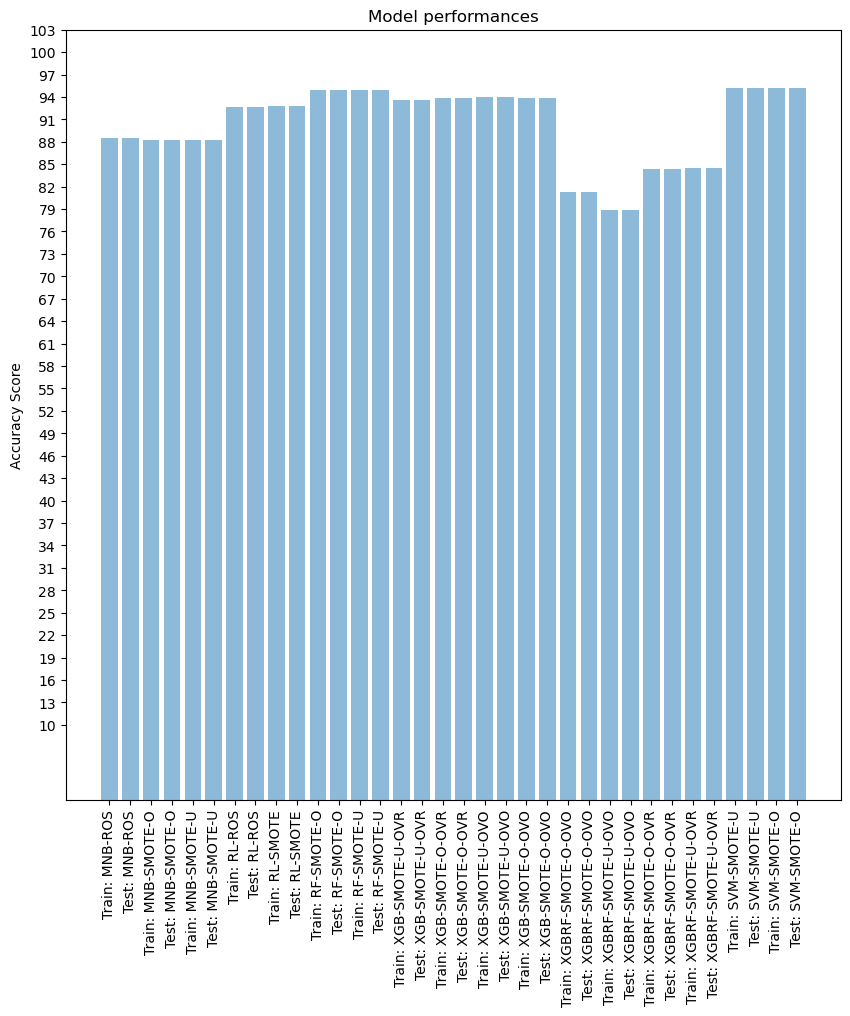

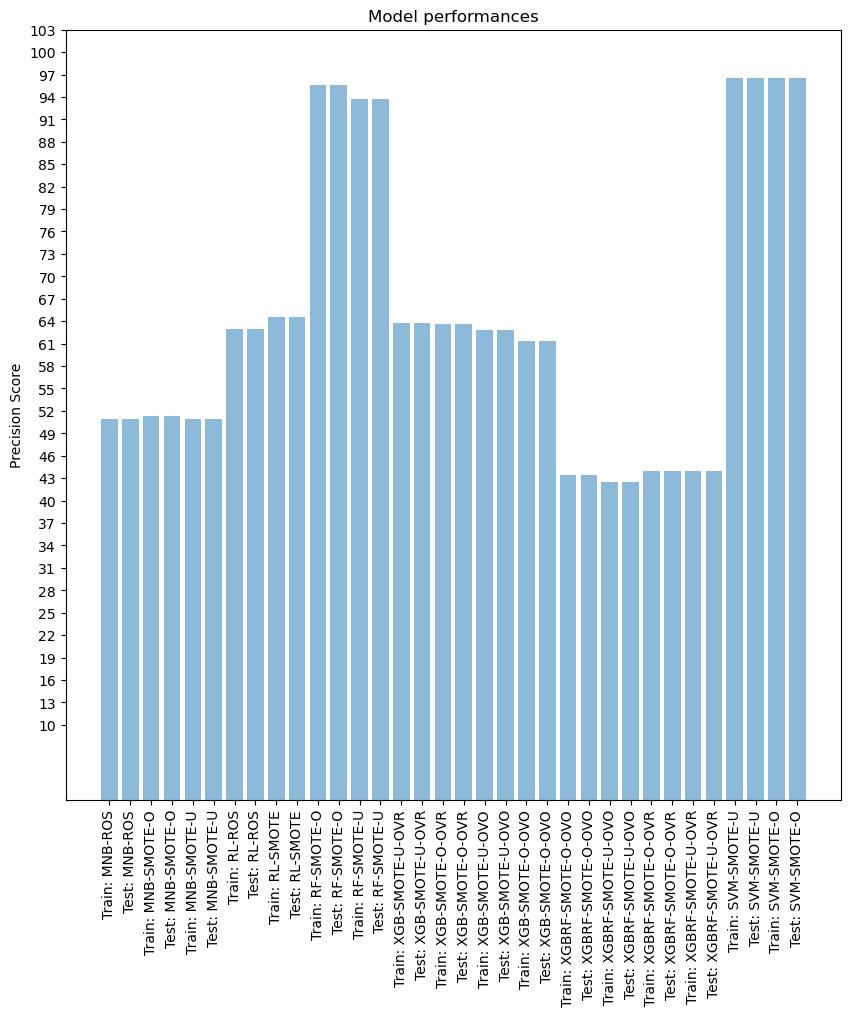

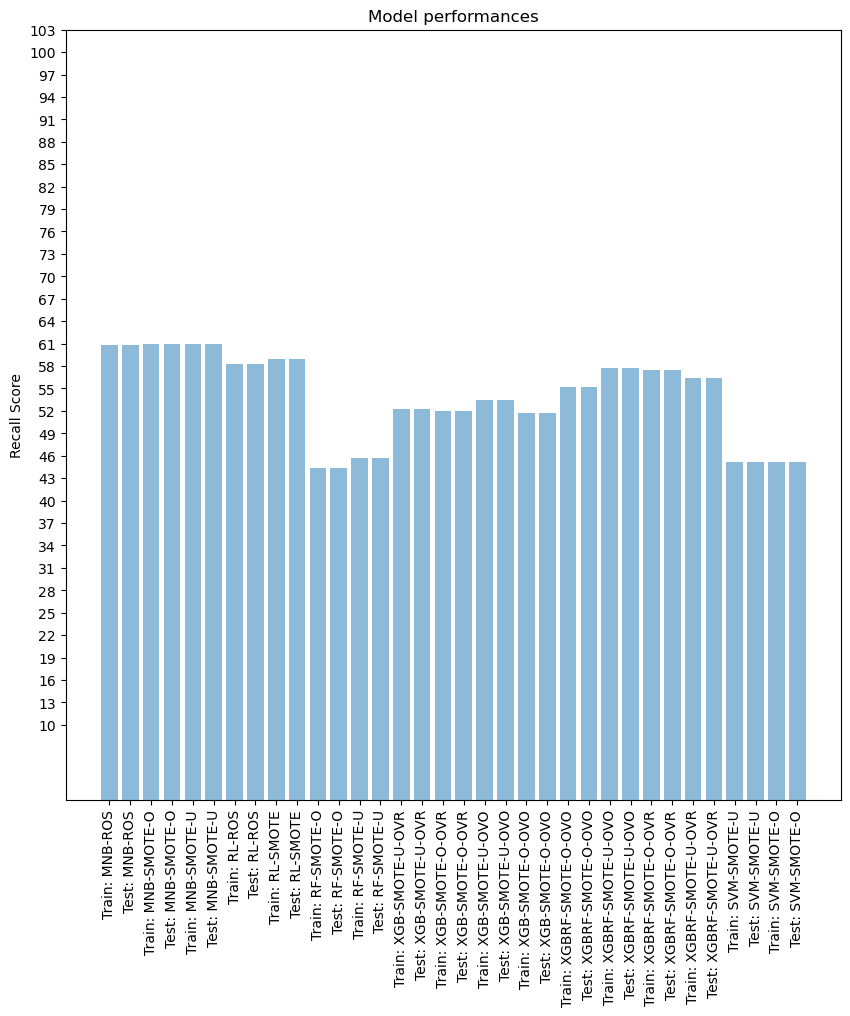

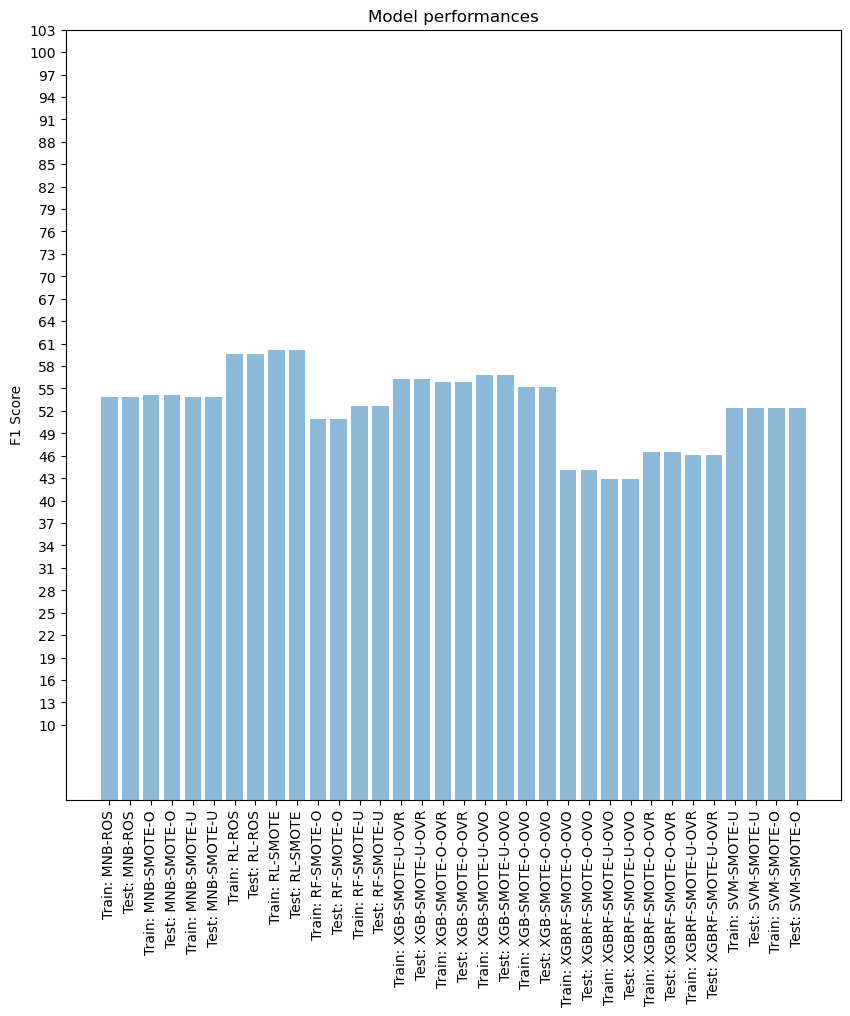

In [172]:
fig = plt.subplots(figsize=(10,10))

objects = ModelName
y_pos = np.arange(len(objects))
performance = OverAll_accuracy

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation=90)
plt.yticks(np.arange(10, 105, step=3))
plt.ylabel('Accuracy Score')
plt.title('Model performances')

plt.show()

fig = plt.subplots(figsize=(10,10))

objects = ModelName
y_pos = np.arange(len(objects))
performance = OverAll_precision

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation=90)
plt.yticks(np.arange(10, 105, step=3))
plt.ylabel('Precision Score')
plt.title('Model performances')

plt.show()

fig = plt.subplots(figsize=(10,10))

objects = ModelName
y_pos = np.arange(len(objects))
performance = OverAll_recall

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation=90)
plt.yticks(np.arange(10, 105, step=3))
plt.ylabel('Recall Score')
plt.title('Model performances')

plt.show()

fig = plt.subplots(figsize=(10,10))

objects = ModelName
y_pos = np.arange(len(objects))
performance = OverAll_f1

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation=90)
plt.yticks(np.arange(10, 105, step=3))
plt.ylabel('F1 Score')
plt.title('Model performances')

plt.show()

## TensorFlow 

### Prepare the data for TensorFlow 

In [173]:
td['document']

0        builtcons great goole amazon inability southw...
1        horoscope best purchased recipe lamp him also...
2        show average screen option a still thing limi...
3                         good exactly wanted price great
4        niece one held purchased dropping protected t...
                              ...                        
3995     all play fun get see family wear is boring ne...
3996     strain great reading reduces love second eye ...
3997     sound cable month solves ordered last account...
3998     fire like amazon black purchased met second c...
3999                fast satisfied efficient job get done
Name: document, Length: 4000, dtype: object

In [174]:
td_test_hidden['document']

0       lot fire amazon one get want used anywhere on...
1       addition great goole like screen amazon sound...
2       best christmas buy great value bought sale us...
3       would anyone casebook use photo small game em...
4            love fantastic item bought person fantastic
                             ...                        
995     briefing use watch love news everyday song ki...
996     speaker hold use loud downside home love pret...
997     said installed blue storage downloaded use fr...
998     said week lady could black item service get r...
999     purchased gift easy mother love navigate firs...
Name: document, Length: 1000, dtype: object

In [175]:
tokenizer = Tokenizer(num_words=50000, oov_token="<OOV>")
tokenizer.fit_on_texts(pd.concat([td['document'],td_test_hidden['document']]))
print(tokenizer.word_index.items())

dict_items([('<OOV>', 1), ('great', 2), ('love', 3), ('use', 4), ('good', 5), ('easy', 6), ('kid', 7), ('amazon', 8), ('bought', 9), ('echo', 10), ('one', 11), ('price', 12), ('work', 13), ('a', 14), ('like', 15), ('fire', 16), ('gift', 17), ('device', 18), ('old', 19), ('book', 20), ('screen', 21), ('year', 22), ('best', 23), ('show', 24), ('would', 25), ('get', 26), ('well', 27), ('time', 28), ('nice', 29), ('game', 30), ('music', 31), ('play', 32), ('much', 33), ('sound', 34), ('reading', 35), ('really', 36), ('perfect', 37), ('apps', 38), ('buy', 39), ('purchased', 40), ('awesome', 41), ('read', 42), ('better', 43), ('need', 44), ('also', 45), ('light', 46), ('video', 47), ('set', 48), ('s', 49), ('thing', 50), ('got', 51), ('new', 52), ('home', 53), ('lot', 54), ('reader', 55), ('fun', 56), ('feature', 57), ('daughter', 58), ('excellent', 59), ('wife', 60), ('speaker', 61), ('size', 62), ('son', 63), ('recommend', 64), ('little', 65), ('purchase', 66), ('make', 67), ('christmas', 

In [176]:
X_train = tokenizer.texts_to_sequences(td['document'])
X_test = tokenizer.texts_to_sequences(td_test_hidden['document'])
print(X_train)

[[2873, 2, 142, 8, 2874, 2875, 32, 254, 163, 108, 1630, 628, 183, 92, 676, 40, 1855, 176, 421, 88, 11, 2876, 44, 906, 729, 442, 12, 114, 131, 2877, 38, 2878, 968, 72, 176, 1856, 729], [2879, 23, 40, 221, 868, 443, 45, 164, 1197, 1458, 77, 101, 788, 969, 8, 869, 756, 1106, 242, 68, 10, 31, 82, 78, 538, 114, 907, 25, 104, 16, 69, 1311, 263, 4, 757, 642, 259, 234, 663, 154, 255, 84, 2880, 155, 102, 66, 15, 1857, 1858, 455, 318, 73, 33, 14, 1032, 216, 10, 41, 8, 69], [24, 970, 21, 198, 14, 83, 50, 412, 970], [5, 328, 97, 12, 2], [466, 11, 758, 40, 1198, 908, 28, 89, 870, 9, 109, 629, 232], [227, 2, 46, 168, 136, 314, 60, 3], [43, 23, 789, 421, 467, 49, 243, 871, 12, 277, 86, 630, 22, 664, 28, 790, 539, 665, 643, 1312, 222, 759, 704, 7, 1631, 71, 872, 2216, 399, 456, 149, 38, 282, 791, 9, 75, 524, 2, 152, 298, 283, 329, 223, 58, 428, 220, 338, 19, 1033, 457, 52, 264, 20, 106, 223, 644, 422], [284, 98, 1199, 43, 40, 63, 30, 61, 1313, 146, 147, 458, 20, 360, 2, 44, 7], [2, 26, 180, 283, 792, 

In [177]:
def FindMaxLength(lst): 
    i = 0
    for x in lst:  
        if len(x) > 128:
            print (str(i) + ": " + str(len(x)))
        i=i+1
        #print (x)
    maxLength = max(len(x) for x in lst ) 
    print(maxLength)

In [178]:
FindMaxLength(X_train)
FindMaxLength(X_test)

306: 190
1013: 385
1668: 139
2088: 190
3295: 144
3767: 223
385
789: 250
852: 385
963: 153
385


In [179]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

4536


In [180]:
maxlen = FindMaxLength(X_test)

789: 250
852: 385
963: 153
385


In [181]:
X_train = pad_sequences(X_train, padding='post', maxlen=128)
X_test = pad_sequences(X_test, padding='post', maxlen=128)
print(X_train)
print(X_train.shape)
print(X_test)
print(X_test.shape)

[[2873    2  142 ...    0    0    0]
 [2879   23   40 ...    0    0    0]
 [  24  970   21 ...    0    0    0]
 ...
 [  34  963  269 ...    0    0    0]
 [  16   15    8 ...    0    0    0]
 [ 131  355 1305 ...    0    0    0]]
(4000, 128)
[[  54   16    8 ...    0    0    0]
 [ 167    2  142 ...    0    0    0]
 [  23   68   39 ...    0    0    0]
 ...
 [ 397  564  585 ...    0    0    0]
 [ 397  258 1900 ...    0    0    0]
 [  40   17    6 ...    0    0    0]]
(1000, 128)


### Glove - calculate Weight

In [182]:
embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [183]:
embedding_matrix = zeros((vocab_size, 100))
embedMissWord = []
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
    else:
        #print(word)
        embedMissWord.append(word)
#print(len(embedMissWord))
#print(len(embedding_matrix))

### Prepare X_train, X_test and y_train, y_test

In [184]:
X_train = tokenizer.texts_to_sequences(td['document'])
X_test = tokenizer.texts_to_sequences(td_test_hidden['document'])
print(X_train)

[[2873, 2, 142, 8, 2874, 2875, 32, 254, 163, 108, 1630, 628, 183, 92, 676, 40, 1855, 176, 421, 88, 11, 2876, 44, 906, 729, 442, 12, 114, 131, 2877, 38, 2878, 968, 72, 176, 1856, 729], [2879, 23, 40, 221, 868, 443, 45, 164, 1197, 1458, 77, 101, 788, 969, 8, 869, 756, 1106, 242, 68, 10, 31, 82, 78, 538, 114, 907, 25, 104, 16, 69, 1311, 263, 4, 757, 642, 259, 234, 663, 154, 255, 84, 2880, 155, 102, 66, 15, 1857, 1858, 455, 318, 73, 33, 14, 1032, 216, 10, 41, 8, 69], [24, 970, 21, 198, 14, 83, 50, 412, 970], [5, 328, 97, 12, 2], [466, 11, 758, 40, 1198, 908, 28, 89, 870, 9, 109, 629, 232], [227, 2, 46, 168, 136, 314, 60, 3], [43, 23, 789, 421, 467, 49, 243, 871, 12, 277, 86, 630, 22, 664, 28, 790, 539, 665, 643, 1312, 222, 759, 704, 7, 1631, 71, 872, 2216, 399, 456, 149, 38, 282, 791, 9, 75, 524, 2, 152, 298, 283, 329, 223, 58, 428, 220, 338, 19, 1033, 457, 52, 264, 20, 106, 223, 644, 422], [284, 98, 1199, 43, 40, 63, 30, 61, 1313, 146, 147, 458, 20, 360, 2, 44, 7], [2, 26, 180, 283, 792, 

In [185]:
FindMaxLength(X_train)
FindMaxLength(X_test)

306: 190
1013: 385
1668: 139
2088: 190
3295: 144
3767: 223
385
789: 250
852: 385
963: 153
385


In [186]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)
maxlen = FindMaxLength(X_test)

4536
789: 250
852: 385
963: 153
385


In [187]:
X_train = pad_sequences(X_train, padding='post', maxlen=100)
X_test = pad_sequences(X_test, padding='post', maxlen=100)
print(X_train)
print(X_train.shape)
print(X_test)
print(X_test.shape)

[[2873    2  142 ...    0    0    0]
 [2879   23   40 ...    0    0    0]
 [  24  970   21 ...    0    0    0]
 ...
 [  34  963  269 ...    0    0    0]
 [  16   15    8 ...    0    0    0]
 [ 131  355 1305 ...    0    0    0]]
(4000, 100)
[[  54   16    8 ...    0    0    0]
 [ 167    2  142 ...    0    0    0]
 [  23   68   39 ...    0    0    0]
 ...
 [ 397  564  585 ...    0    0    0]
 [ 397  258 1900 ...    0    0    0]
 [  40   17    6 ...    0    0    0]]
(1000, 100)


In [188]:
X_train.shape

(4000, 100)

In [189]:
y.shape

(4000,)

### SMOTE over sampling

In [190]:
print (Counter(y))

Counter({2: 3749, 1: 158, 0: 93})


In [191]:
print (Counter(y_test_hidden))

Counter({2: 937, 1: 39, 0: 24})


In [192]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_, y_train_ = sm.fit_resample(X_train, y)
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_test_hidden_, y_test_hidden_ = sm.fit_resample(X_test, y_test_hidden)

In [193]:
print (Counter(y_train_))

Counter({2: 3749, 1: 3749, 0: 3749})


In [194]:
print (Counter(y_test_hidden_))

Counter({2: 937, 0: 937, 1: 937})


## Deep Learning Model function

In [195]:
def DLModel(model, X, Y, X_test_hidden_, y_test_hidden_):
    lossList = []
    val_lossList = []
    categorical_accuracyList = []
    val_categorical_accuracyList = []
    
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=777)
      
    for train, test in kfold.split(X, Y):  
        X_train, X_test, y_train, y_test = train_test_split(X[train], Y[train], test_size=0.33, random_state=42)
        history = model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_test, y_test), verbose=1)
        print('-'*50)
        
        #score = model.evaluate(X_test, y_test)

        #print('-'*50)
        #print("Train Data")
        #print('-'*50)

        #print("Train Score:", score[0])
        #print("Train Accuracy:", score[1])
        
        lossList.append(history.history['loss'])
        val_lossList.append(history.history['val_loss'])
        categorical_accuracyList.append(history.history['categorical_accuracy'])
        val_categorical_accuracyList.append(history.history['val_categorical_accuracy'])

    plt.plot(lossList, label='Training data')
    plt.plot(val_lossList, label='Validation data')
    plt.title('Loss for the Text Classification')
    plt.ylabel('Loss Value')
    plt.xlabel('No. epoch')
    plt.legend(loc="upper left")
    plt.show()
    plt.plot(categorical_accuracyList, label='Training data')
    plt.plot(val_categorical_accuracyList, label='CategoricalCrossentropy (validation data)')
    plt.title('CategoricalAccuracy for the Text Classification')
    plt.ylabel('CategoricalAccuracy Value')
    plt.xlabel('No. epoch')
    plt.legend(loc="upper left")
    plt.show()
    print('-'*50)
    print("Test with Hidden data")
    print('-'*50)
    score = model.evaluate(X_test_hidden_, y_test_hidden_)
    
    print("Test Score:", score[0])
    print("Test Accuracy:", score[1])
    
    return

## Simple CNN - Keras

In [196]:
model = tf.keras.Sequential()
embedding_layer = tf.keras.layers.Embedding(4547, 128, input_length=100, embeddings_regularizer = tf.keras.regularizers.l2(0.0005), trainable=False)
model.add(embedding_layer)
model.add(tf.keras.layers.Conv1D(32, 3, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.0005), bias_regularizer = tf.keras.regularizers.l2(0.0005)))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_regularizer = tf.keras.regularizers.l2(0.0001), bias_regularizer = tf.keras.regularizers.l2(0.0001)))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=['CategoricalAccuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          582016    
_________________________________________________________________
conv1d (Conv1D)              (None, 98, 32)            12320     
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 594,369
Trainable params: 12,353
Non-trainable params: 582,016
_________________________________________________________________
None


Epoch 1/100
53/53 [==============================] - 1s 14ms/step - loss: 0.2621 - categorical_accuracy: 1.0000 - val_loss: 0.2571 - val_categorical_accuracy: 1.0000
Epoch 2/100
53/53 [==============================] - 1s 11ms/step - loss: 0.2548 - categorical_accuracy: 1.0000 - val_loss: 0.2534 - val_categorical_accuracy: 1.0000
Epoch 3/100
53/53 [==============================] - 1s 11ms/step - loss: 0.2533 - categorical_accuracy: 1.0000 - val_loss: 0.2538 - val_categorical_accuracy: 1.0000
Epoch 4/100
53/53 [==============================] - 1s 11ms/step - loss: 0.2549 - categorical_accuracy: 1.0000 - val_loss: 0.2562 - val_categorical_accuracy: 1.0000
Epoch 5/100
53/53 [==============================] - 1s 12ms/step - loss: 0.2578 - categorical_accuracy: 1.0000 - val_loss: 0.2595 - val_categorical_accuracy: 1.0000
Epoch 6/100
53/53 [==============================] - 1s 11ms/step - loss: 0.2611 - categorical_accuracy: 1.0000 - val_loss: 0.2628 - val_categorical_accuracy: 1.0000
Epoc

53/53 [==============================] - 1s 12ms/step - loss: 0.2787 - categorical_accuracy: 1.0000 - val_loss: 0.2788 - val_categorical_accuracy: 1.0000
Epoch 51/100
53/53 [==============================] - 1s 13ms/step - loss: 0.2788 - categorical_accuracy: 1.0000 - val_loss: 0.2789 - val_categorical_accuracy: 1.0000
Epoch 52/100
53/53 [==============================] - 1s 12ms/step - loss: 0.2790 - categorical_accuracy: 1.0000 - val_loss: 0.2790 - val_categorical_accuracy: 1.0000
Epoch 53/100
53/53 [==============================] - 1s 11ms/step - loss: 0.2791 - categorical_accuracy: 1.0000 - val_loss: 0.2792 - val_categorical_accuracy: 1.0000
Epoch 54/100
53/53 [==============================] - 1s 11ms/step - loss: 0.2792 - categorical_accuracy: 1.0000 - val_loss: 0.2792 - val_categorical_accuracy: 1.0000
Epoch 55/100
53/53 [==============================] - 1s 11ms/step - loss: 0.2794 - categorical_accuracy: 1.0000 - val_loss: 0.2794 - val_categorical_accuracy: 1.0000
Epoch 56/10

53/53 [==============================] - 1s 12ms/step - loss: 0.2884 - categorical_accuracy: 1.0000 - val_loss: 0.2884 - val_categorical_accuracy: 1.0000
Epoch 100/100
53/53 [==============================] - 1s 12ms/step - loss: 0.2886 - categorical_accuracy: 1.0000 - val_loss: 0.2887 - val_categorical_accuracy: 1.0000
--------------------------------------------------
Epoch 1/100
53/53 [==============================] - 1s 12ms/step - loss: 0.2888 - categorical_accuracy: 1.0000 - val_loss: 0.2889 - val_categorical_accuracy: 1.0000
Epoch 2/100
53/53 [==============================] - 1s 14ms/step - loss: 0.2888 - categorical_accuracy: 1.0000 - val_loss: 0.2887 - val_categorical_accuracy: 1.0000
Epoch 3/100
53/53 [==============================] - 1s 12ms/step - loss: 0.2886 - categorical_accuracy: 1.0000 - val_loss: 0.2887 - val_categorical_accuracy: 1.0000
Epoch 4/100
53/53 [==============================] - 1s 14ms/step - loss: 0.2887 - categorical_accuracy: 1.0000 - val_loss: 0.288

Epoch 48/100
53/53 [==============================] - 1s 11ms/step - loss: 0.2962 - categorical_accuracy: 1.0000 - val_loss: 0.2962 - val_categorical_accuracy: 1.0000
Epoch 49/100
53/53 [==============================] - 1s 12ms/step - loss: 0.2962 - categorical_accuracy: 1.0000 - val_loss: 0.2962 - val_categorical_accuracy: 1.0000
Epoch 50/100
53/53 [==============================] - 1s 11ms/step - loss: 0.2963 - categorical_accuracy: 1.0000 - val_loss: 0.2964 - val_categorical_accuracy: 1.0000
Epoch 51/100
53/53 [==============================] - 1s 12ms/step - loss: 0.2964 - categorical_accuracy: 1.0000 - val_loss: 0.2965 - val_categorical_accuracy: 1.0000
Epoch 52/100
53/53 [==============================] - 1s 12ms/step - loss: 0.2966 - categorical_accuracy: 1.0000 - val_loss: 0.2967 - val_categorical_accuracy: 1.0000
Epoch 53/100
53/53 [==============================] - 1s 11ms/step - loss: 0.2967 - categorical_accuracy: 1.0000 - val_loss: 0.2967 - val_categorical_accuracy: 1.000

53/53 [==============================] - 1s 12ms/step - loss: 0.3009 - categorical_accuracy: 1.0000 - val_loss: 0.3010 - val_categorical_accuracy: 1.0000
Epoch 98/100
53/53 [==============================] - 1s 11ms/step - loss: 0.3011 - categorical_accuracy: 1.0000 - val_loss: 0.3012 - val_categorical_accuracy: 1.0000
Epoch 99/100
53/53 [==============================] - 1s 11ms/step - loss: 0.3012 - categorical_accuracy: 1.0000 - val_loss: 0.3012 - val_categorical_accuracy: 1.0000
Epoch 100/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3012 - categorical_accuracy: 1.0000 - val_loss: 0.3013 - val_categorical_accuracy: 1.0000
--------------------------------------------------
Epoch 1/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3012 - categorical_accuracy: 1.0000 - val_loss: 0.3010 - val_categorical_accuracy: 1.0000
Epoch 2/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3009 - categorical_accuracy: 1.0000 - val_loss: 0.3

Epoch 46/100
53/53 [==============================] - 1s 11ms/step - loss: 0.3016 - categorical_accuracy: 1.0000 - val_loss: 0.3016 - val_categorical_accuracy: 1.0000
Epoch 47/100
53/53 [==============================] - 1s 11ms/step - loss: 0.3016 - categorical_accuracy: 1.0000 - val_loss: 0.3016 - val_categorical_accuracy: 1.0000
Epoch 48/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3017 - categorical_accuracy: 1.0000 - val_loss: 0.3018 - val_categorical_accuracy: 1.0000
Epoch 49/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3019 - categorical_accuracy: 1.0000 - val_loss: 0.3019 - val_categorical_accuracy: 1.0000
Epoch 50/100
53/53 [==============================] - 1s 11ms/step - loss: 0.3019 - categorical_accuracy: 1.0000 - val_loss: 0.3019 - val_categorical_accuracy: 1.0000
Epoch 51/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3019 - categorical_accuracy: 1.0000 - val_loss: 0.3019 - val_categorical_accuracy: 1.000

53/53 [==============================] - 1s 11ms/step - loss: 0.3040 - categorical_accuracy: 1.0000 - val_loss: 0.3040 - val_categorical_accuracy: 1.0000
Epoch 96/100
53/53 [==============================] - 1s 13ms/step - loss: 0.3040 - categorical_accuracy: 1.0000 - val_loss: 0.3040 - val_categorical_accuracy: 1.0000
Epoch 97/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3039 - categorical_accuracy: 1.0000 - val_loss: 0.3039 - val_categorical_accuracy: 1.0000
Epoch 98/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3040 - categorical_accuracy: 1.0000 - val_loss: 0.3041 - val_categorical_accuracy: 1.0000
Epoch 99/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3041 - categorical_accuracy: 1.0000 - val_loss: 0.3042 - val_categorical_accuracy: 1.0000
Epoch 100/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3041 - categorical_accuracy: 1.0000 - val_loss: 0.3041 - val_categorical_accuracy: 1.0000
----------

Epoch 44/100
53/53 [==============================] - 1s 11ms/step - loss: 0.3028 - categorical_accuracy: 1.0000 - val_loss: 0.3028 - val_categorical_accuracy: 1.0000
Epoch 45/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3028 - categorical_accuracy: 1.0000 - val_loss: 0.3028 - val_categorical_accuracy: 1.0000
Epoch 46/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3028 - categorical_accuracy: 1.0000 - val_loss: 0.3028 - val_categorical_accuracy: 1.0000
Epoch 47/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3029 - categorical_accuracy: 1.0000 - val_loss: 0.3028 - val_categorical_accuracy: 1.0000
Epoch 48/100
53/53 [==============================] - 1s 11ms/step - loss: 0.3029 - categorical_accuracy: 1.0000 - val_loss: 0.3028 - val_categorical_accuracy: 1.0000
Epoch 49/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3028 - categorical_accuracy: 1.0000 - val_loss: 0.3028 - val_categorical_accuracy: 1.000

53/53 [==============================] - 1s 12ms/step - loss: 0.3041 - categorical_accuracy: 1.0000 - val_loss: 0.3041 - val_categorical_accuracy: 1.0000
Epoch 94/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3041 - categorical_accuracy: 1.0000 - val_loss: 0.3042 - val_categorical_accuracy: 1.0000
Epoch 95/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3042 - categorical_accuracy: 1.0000 - val_loss: 0.3043 - val_categorical_accuracy: 1.0000
Epoch 96/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3042 - categorical_accuracy: 1.0000 - val_loss: 0.3042 - val_categorical_accuracy: 1.0000
Epoch 97/100
53/53 [==============================] - 1s 11ms/step - loss: 0.3042 - categorical_accuracy: 1.0000 - val_loss: 0.3042 - val_categorical_accuracy: 1.0000
Epoch 98/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3042 - categorical_accuracy: 1.0000 - val_loss: 0.3043 - val_categorical_accuracy: 1.0000
Epoch 99/10

Epoch 42/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3029 - categorical_accuracy: 1.0000 - val_loss: 0.3030 - val_categorical_accuracy: 1.0000
Epoch 43/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3029 - categorical_accuracy: 1.0000 - val_loss: 0.3029 - val_categorical_accuracy: 1.0000
Epoch 44/100
53/53 [==============================] - 1s 13ms/step - loss: 0.3029 - categorical_accuracy: 1.0000 - val_loss: 0.3029 - val_categorical_accuracy: 1.0000
Epoch 45/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3029 - categorical_accuracy: 1.0000 - val_loss: 0.3029 - val_categorical_accuracy: 1.0000
Epoch 46/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3030 - categorical_accuracy: 1.0000 - val_loss: 0.3030 - val_categorical_accuracy: 1.0000
Epoch 47/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3031 - categorical_accuracy: 1.0000 - val_loss: 0.3032 - val_categorical_accuracy: 1.000

53/53 [==============================] - 1s 13ms/step - loss: 0.3041 - categorical_accuracy: 1.0000 - val_loss: 0.3041 - val_categorical_accuracy: 1.0000
Epoch 92/100
53/53 [==============================] - 1s 15ms/step - loss: 0.3041 - categorical_accuracy: 1.0000 - val_loss: 0.3041 - val_categorical_accuracy: 1.0000
Epoch 93/100
53/53 [==============================] - 1s 14ms/step - loss: 0.3041 - categorical_accuracy: 1.0000 - val_loss: 0.3042 - val_categorical_accuracy: 1.0000
Epoch 94/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3042 - categorical_accuracy: 1.0000 - val_loss: 0.3042 - val_categorical_accuracy: 1.0000
Epoch 95/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3041 - categorical_accuracy: 1.0000 - val_loss: 0.3042 - val_categorical_accuracy: 1.0000
Epoch 96/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3042 - categorical_accuracy: 1.0000 - val_loss: 0.3042 - val_categorical_accuracy: 1.0000
Epoch 97/10

Epoch 40/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3042 - categorical_accuracy: 1.0000 - val_loss: 0.3042 - val_categorical_accuracy: 1.0000
Epoch 41/100
53/53 [==============================] - 1s 11ms/step - loss: 0.3042 - categorical_accuracy: 1.0000 - val_loss: 0.3043 - val_categorical_accuracy: 1.0000
Epoch 42/100
53/53 [==============================] - 1s 11ms/step - loss: 0.3043 - categorical_accuracy: 1.0000 - val_loss: 0.3043 - val_categorical_accuracy: 1.0000
Epoch 43/100
53/53 [==============================] - 1s 11ms/step - loss: 0.3044 - categorical_accuracy: 1.0000 - val_loss: 0.3044 - val_categorical_accuracy: 1.0000
Epoch 44/100
53/53 [==============================] - 1s 11ms/step - loss: 0.3044 - categorical_accuracy: 1.0000 - val_loss: 0.3044 - val_categorical_accuracy: 1.0000
Epoch 45/100
53/53 [==============================] - 1s 11ms/step - loss: 0.3045 - categorical_accuracy: 1.0000 - val_loss: 0.3045 - val_categorical_accuracy: 1.000

53/53 [==============================] - 1s 11ms/step - loss: 0.3054 - categorical_accuracy: 1.0000 - val_loss: 0.3053 - val_categorical_accuracy: 1.0000
Epoch 90/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3054 - categorical_accuracy: 1.0000 - val_loss: 0.3054 - val_categorical_accuracy: 1.0000
Epoch 91/100
53/53 [==============================] - 1s 11ms/step - loss: 0.3054 - categorical_accuracy: 1.0000 - val_loss: 0.3054 - val_categorical_accuracy: 1.0000
Epoch 92/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3054 - categorical_accuracy: 1.0000 - val_loss: 0.3054 - val_categorical_accuracy: 1.0000
Epoch 93/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3055 - categorical_accuracy: 1.0000 - val_loss: 0.3055 - val_categorical_accuracy: 1.0000
Epoch 94/100
53/53 [==============================] - 1s 11ms/step - loss: 0.3055 - categorical_accuracy: 1.0000 - val_loss: 0.3055 - val_categorical_accuracy: 1.0000
Epoch 95/10

Epoch 38/100
53/53 [==============================] - 1s 11ms/step - loss: 0.3046 - categorical_accuracy: 1.0000 - val_loss: 0.3046 - val_categorical_accuracy: 1.0000
Epoch 39/100
53/53 [==============================] - 1s 11ms/step - loss: 0.3046 - categorical_accuracy: 1.0000 - val_loss: 0.3046 - val_categorical_accuracy: 1.0000
Epoch 40/100
53/53 [==============================] - 1s 11ms/step - loss: 0.3047 - categorical_accuracy: 1.0000 - val_loss: 0.3047 - val_categorical_accuracy: 1.0000
Epoch 41/100
53/53 [==============================] - 1s 11ms/step - loss: 0.3047 - categorical_accuracy: 1.0000 - val_loss: 0.3048 - val_categorical_accuracy: 1.0000
Epoch 42/100
53/53 [==============================] - 1s 11ms/step - loss: 0.3048 - categorical_accuracy: 1.0000 - val_loss: 0.3048 - val_categorical_accuracy: 1.0000
Epoch 43/100
53/53 [==============================] - 1s 11ms/step - loss: 0.3048 - categorical_accuracy: 1.0000 - val_loss: 0.3048 - val_categorical_accuracy: 1.000

53/53 [==============================] - 1s 12ms/step - loss: 0.3060 - categorical_accuracy: 1.0000 - val_loss: 0.3060 - val_categorical_accuracy: 1.0000
Epoch 88/100
53/53 [==============================] - 1s 11ms/step - loss: 0.3060 - categorical_accuracy: 1.0000 - val_loss: 0.3060 - val_categorical_accuracy: 1.0000
Epoch 89/100
53/53 [==============================] - 1s 11ms/step - loss: 0.3060 - categorical_accuracy: 1.0000 - val_loss: 0.3060 - val_categorical_accuracy: 1.0000
Epoch 90/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3060 - categorical_accuracy: 1.0000 - val_loss: 0.3060 - val_categorical_accuracy: 1.0000
Epoch 91/100
53/53 [==============================] - 1s 11ms/step - loss: 0.3061 - categorical_accuracy: 1.0000 - val_loss: 0.3063 - val_categorical_accuracy: 1.0000
Epoch 92/100
53/53 [==============================] - 1s 11ms/step - loss: 0.3062 - categorical_accuracy: 1.0000 - val_loss: 0.3062 - val_categorical_accuracy: 1.0000
Epoch 93/10

Epoch 36/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3058 - categorical_accuracy: 1.0000 - val_loss: 0.3058 - val_categorical_accuracy: 1.0000
Epoch 37/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3059 - categorical_accuracy: 1.0000 - val_loss: 0.3059 - val_categorical_accuracy: 1.0000
Epoch 38/100
53/53 [==============================] - 1s 13ms/step - loss: 0.3059 - categorical_accuracy: 1.0000 - val_loss: 0.3060 - val_categorical_accuracy: 1.0000
Epoch 39/100
53/53 [==============================] - 1s 13ms/step - loss: 0.3060 - categorical_accuracy: 1.0000 - val_loss: 0.3060 - val_categorical_accuracy: 1.0000
Epoch 40/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3061 - categorical_accuracy: 1.0000 - val_loss: 0.3061 - val_categorical_accuracy: 1.0000
Epoch 41/100
53/53 [==============================] - 1s 11ms/step - loss: 0.3061 - categorical_accuracy: 1.0000 - val_loss: 0.3061 - val_categorical_accuracy: 1.000

53/53 [==============================] - 1s 12ms/step - loss: 0.3072 - categorical_accuracy: 1.0000 - val_loss: 0.3071 - val_categorical_accuracy: 1.0000
Epoch 86/100
53/53 [==============================] - 1s 11ms/step - loss: 0.3071 - categorical_accuracy: 1.0000 - val_loss: 0.3071 - val_categorical_accuracy: 1.0000
Epoch 87/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3072 - categorical_accuracy: 1.0000 - val_loss: 0.3072 - val_categorical_accuracy: 1.0000
Epoch 88/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3072 - categorical_accuracy: 1.0000 - val_loss: 0.3072 - val_categorical_accuracy: 1.0000
Epoch 89/100
53/53 [==============================] - 1s 13ms/step - loss: 0.3072 - categorical_accuracy: 1.0000 - val_loss: 0.3073 - val_categorical_accuracy: 1.0000
Epoch 90/100
53/53 [==============================] - 1s 13ms/step - loss: 0.3072 - categorical_accuracy: 1.0000 - val_loss: 0.3072 - val_categorical_accuracy: 1.0000
Epoch 91/10

Epoch 34/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3055 - categorical_accuracy: 1.0000 - val_loss: 0.3055 - val_categorical_accuracy: 1.0000
Epoch 35/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3056 - categorical_accuracy: 1.0000 - val_loss: 0.3056 - val_categorical_accuracy: 1.0000
Epoch 36/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3056 - categorical_accuracy: 1.0000 - val_loss: 0.3057 - val_categorical_accuracy: 1.0000
Epoch 37/100
53/53 [==============================] - 1s 13ms/step - loss: 0.3057 - categorical_accuracy: 1.0000 - val_loss: 0.3058 - val_categorical_accuracy: 1.0000
Epoch 38/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3058 - categorical_accuracy: 1.0000 - val_loss: 0.3058 - val_categorical_accuracy: 1.0000
Epoch 39/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3059 - categorical_accuracy: 1.0000 - val_loss: 0.3059 - val_categorical_accuracy: 1.000

53/53 [==============================] - 1s 12ms/step - loss: 0.3064 - categorical_accuracy: 1.0000 - val_loss: 0.3064 - val_categorical_accuracy: 1.0000
Epoch 84/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3064 - categorical_accuracy: 1.0000 - val_loss: 0.3064 - val_categorical_accuracy: 1.0000
Epoch 85/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3064 - categorical_accuracy: 1.0000 - val_loss: 0.3065 - val_categorical_accuracy: 1.0000
Epoch 86/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3065 - categorical_accuracy: 1.0000 - val_loss: 0.3064 - val_categorical_accuracy: 1.0000
Epoch 87/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3065 - categorical_accuracy: 1.0000 - val_loss: 0.3065 - val_categorical_accuracy: 1.0000
Epoch 88/100
53/53 [==============================] - 1s 13ms/step - loss: 0.3064 - categorical_accuracy: 1.0000 - val_loss: 0.3064 - val_categorical_accuracy: 1.0000
Epoch 89/10

Epoch 32/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3052 - categorical_accuracy: 1.0000 - val_loss: 0.3052 - val_categorical_accuracy: 1.0000
Epoch 33/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3052 - categorical_accuracy: 1.0000 - val_loss: 0.3052 - val_categorical_accuracy: 1.0000
Epoch 34/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3052 - categorical_accuracy: 1.0000 - val_loss: 0.3052 - val_categorical_accuracy: 1.0000
Epoch 35/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3052 - categorical_accuracy: 1.0000 - val_loss: 0.3052 - val_categorical_accuracy: 1.0000
Epoch 36/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3052 - categorical_accuracy: 1.0000 - val_loss: 0.3052 - val_categorical_accuracy: 1.0000
Epoch 37/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3053 - categorical_accuracy: 1.0000 - val_loss: 0.3053 - val_categorical_accuracy: 1.000

53/53 [==============================] - 1s 12ms/step - loss: 0.3065 - categorical_accuracy: 1.0000 - val_loss: 0.3066 - val_categorical_accuracy: 1.0000
Epoch 82/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3066 - categorical_accuracy: 1.0000 - val_loss: 0.3065 - val_categorical_accuracy: 1.0000
Epoch 83/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3065 - categorical_accuracy: 1.0000 - val_loss: 0.3065 - val_categorical_accuracy: 1.0000
Epoch 84/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3065 - categorical_accuracy: 1.0000 - val_loss: 0.3065 - val_categorical_accuracy: 1.0000
Epoch 85/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3064 - categorical_accuracy: 1.0000 - val_loss: 0.3064 - val_categorical_accuracy: 1.0000
Epoch 86/100
53/53 [==============================] - 1s 12ms/step - loss: 0.3064 - categorical_accuracy: 1.0000 - val_loss: 0.3064 - val_categorical_accuracy: 1.0000
Epoch 87/10

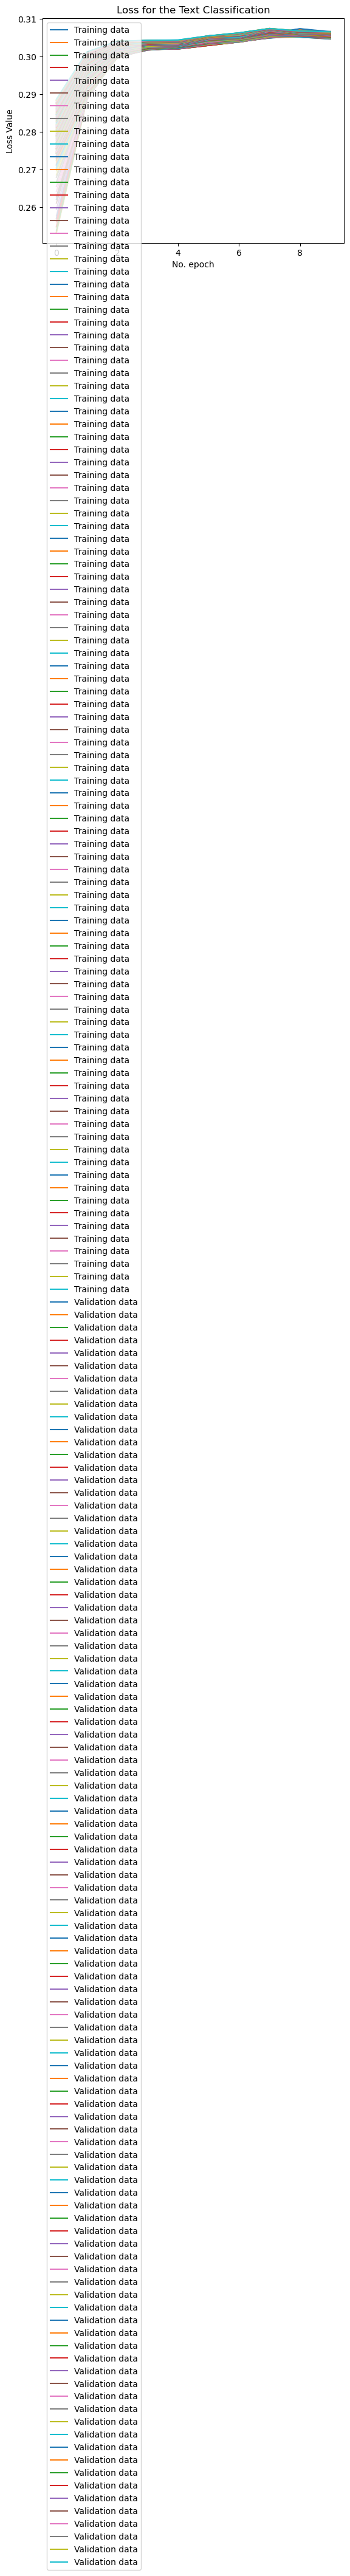

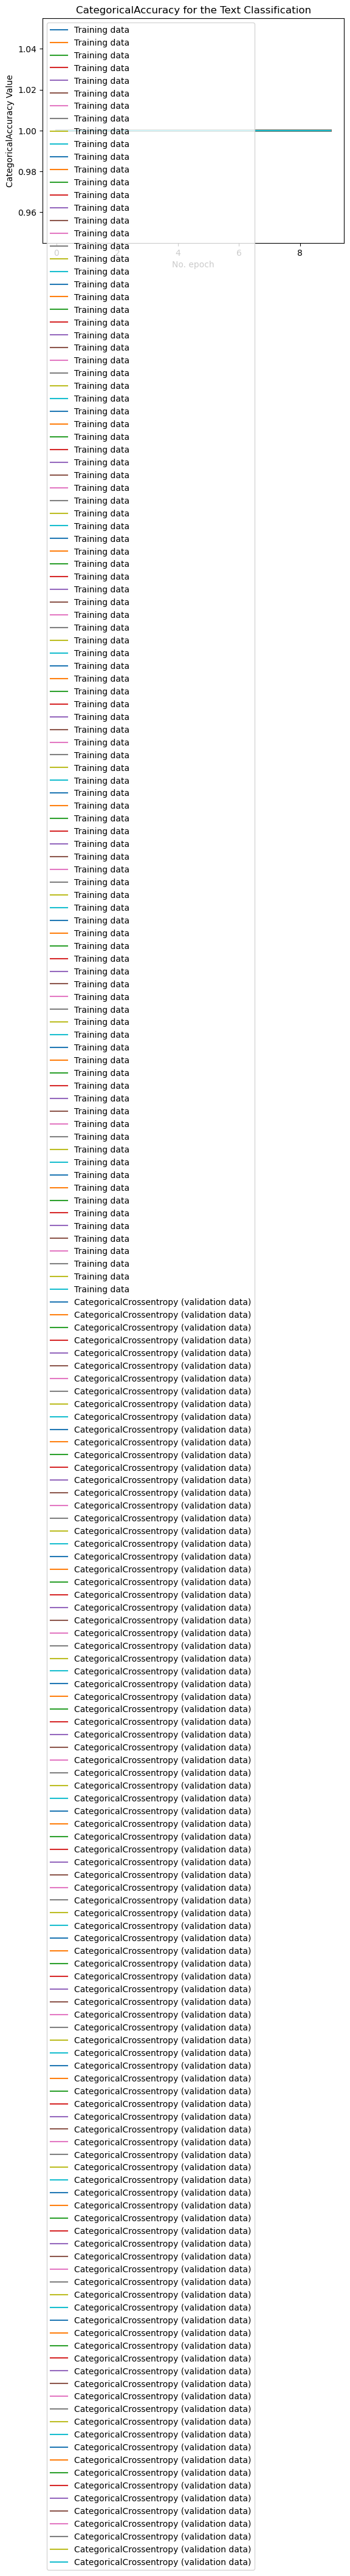

--------------------------------------------------
Test with Hidden data
--------------------------------------------------
88/88 [==============================] - 0s 2ms/step - loss: 0.3066 - categorical_accuracy: 1.0000
Test Score: 0.30661067366600037
Test Accuracy: 1.0


In [197]:
DLModel(model, X_train_, y_train_, X_test_hidden_, y_test_hidden_)

## Simple CNN with Weights - Keras 

In [200]:
model = tf.keras.Sequential()
embedding_layer = tf.keras.layers.Embedding(4536, 100, input_length=100, weights=[embedding_matrix], embeddings_regularizer = tf.keras.regularizers.l2(0.0005), trainable=False)
model.add(embedding_layer)
model.add(tf.keras.layers.Conv1D(32, 3, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.0005), bias_regularizer = tf.keras.regularizers.l2(0.0005)))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_regularizer = tf.keras.regularizers.l2(0.0001), bias_regularizer = tf.keras.regularizers.l2(0.0001)))

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=['CategoricalAccuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          453600    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 98, 32)            9632      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 463,265
Trainable params: 9,665
Non-trainable params: 453,600
_________________________________________________________________
None


Epoch 1/100
53/53 [==============================] - 1s 12ms/step - loss: 60.5297 - categorical_accuracy: 1.0000 - val_loss: 60.5290 - val_categorical_accuracy: 1.0000
Epoch 2/100
53/53 [==============================] - 1s 9ms/step - loss: 60.5286 - categorical_accuracy: 1.0000 - val_loss: 60.5282 - val_categorical_accuracy: 1.0000
Epoch 3/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5280 - categorical_accuracy: 1.0000 - val_loss: 60.5277 - val_categorical_accuracy: 1.0000
Epoch 4/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5276 - categorical_accuracy: 1.0000 - val_loss: 60.5275 - val_categorical_accuracy: 1.0000
Epoch 5/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5274 - categorical_accuracy: 1.0000 - val_loss: 60.5272 - val_categorical_accuracy: 1.0000
Epoch 6/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5272 - categorical_accuracy: 1.0000 - val_loss: 60.5271 - val_categorical_accuracy: 

53/53 [==============================] - 1s 10ms/step - loss: 60.5273 - categorical_accuracy: 1.0000 - val_loss: 60.5272 - val_categorical_accuracy: 1.0000
Epoch 50/100
53/53 [==============================] - 1s 11ms/step - loss: 60.5273 - categorical_accuracy: 1.0000 - val_loss: 60.5273 - val_categorical_accuracy: 1.0000
Epoch 51/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5273 - categorical_accuracy: 1.0000 - val_loss: 60.5274 - val_categorical_accuracy: 1.0000
Epoch 52/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5274 - categorical_accuracy: 1.0000 - val_loss: 60.5275 - val_categorical_accuracy: 1.0000
Epoch 53/100
53/53 [==============================] - 1s 11ms/step - loss: 60.5275 - categorical_accuracy: 1.0000 - val_loss: 60.5275 - val_categorical_accuracy: 1.0000
Epoch 54/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5275 - categorical_accuracy: 1.0000 - val_loss: 60.5275 - val_categorical_accuracy: 1.0000


Epoch 98/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5300 - categorical_accuracy: 1.0000 - val_loss: 60.5300 - val_categorical_accuracy: 1.0000
Epoch 99/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5300 - categorical_accuracy: 1.0000 - val_loss: 60.5301 - val_categorical_accuracy: 1.0000
Epoch 100/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5300 - categorical_accuracy: 1.0000 - val_loss: 60.5301 - val_categorical_accuracy: 1.0000
--------------------------------------------------
Epoch 1/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5301 - categorical_accuracy: 1.0000 - val_loss: 60.5301 - val_categorical_accuracy: 1.0000
Epoch 2/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5301 - categorical_accuracy: 1.0000 - val_loss: 60.5300 - val_categorical_accuracy: 1.0000
Epoch 3/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5300 - categorical_accuracy: 1.00

53/53 [==============================] - 1s 11ms/step - loss: 60.5315 - categorical_accuracy: 1.0000 - val_loss: 60.5316 - val_categorical_accuracy: 1.0000
Epoch 47/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5316 - categorical_accuracy: 1.0000 - val_loss: 60.5316 - val_categorical_accuracy: 1.0000
Epoch 48/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5317 - categorical_accuracy: 1.0000 - val_loss: 60.5316 - val_categorical_accuracy: 1.0000
Epoch 49/100
53/53 [==============================] - 1s 11ms/step - loss: 60.5317 - categorical_accuracy: 1.0000 - val_loss: 60.5317 - val_categorical_accuracy: 1.0000
Epoch 50/100
53/53 [==============================] - 1s 11ms/step - loss: 60.5317 - categorical_accuracy: 1.0000 - val_loss: 60.5317 - val_categorical_accuracy: 1.0000
Epoch 51/100
53/53 [==============================] - 1s 11ms/step - loss: 60.5318 - categorical_accuracy: 1.0000 - val_loss: 60.5318 - val_categorical_accuracy: 1.0000

53/53 [==============================] - 1s 10ms/step - loss: 60.5338 - categorical_accuracy: 1.0000 - val_loss: 60.5338 - val_categorical_accuracy: 1.0000
Epoch 95/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5339 - categorical_accuracy: 1.0000 - val_loss: 60.5339 - val_categorical_accuracy: 1.0000
Epoch 96/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5339 - categorical_accuracy: 1.0000 - val_loss: 60.5339 - val_categorical_accuracy: 1.0000
Epoch 97/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5339 - categorical_accuracy: 1.0000 - val_loss: 60.5339 - val_categorical_accuracy: 1.0000
Epoch 98/100
53/53 [==============================] - 1s 11ms/step - loss: 60.5339 - categorical_accuracy: 1.0000 - val_loss: 60.5340 - val_categorical_accuracy: 1.0000
Epoch 99/100
53/53 [==============================] - 1s 11ms/step - loss: 60.5340 - categorical_accuracy: 1.0000 - val_loss: 60.5340 - val_categorical_accuracy: 1.0000

53/53 [==============================] - 1s 10ms/step - loss: 60.5344 - categorical_accuracy: 1.0000 - val_loss: 60.5344 - val_categorical_accuracy: 1.0000
Epoch 43/100
53/53 [==============================] - 1s 9ms/step - loss: 60.5344 - categorical_accuracy: 1.0000 - val_loss: 60.5344 - val_categorical_accuracy: 1.0000
Epoch 44/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5344 - categorical_accuracy: 1.0000 - val_loss: 60.5345 - val_categorical_accuracy: 1.0000
Epoch 45/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5345 - categorical_accuracy: 1.0000 - val_loss: 60.5345 - val_categorical_accuracy: 1.0000
Epoch 46/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5345 - categorical_accuracy: 1.0000 - val_loss: 60.5345 - val_categorical_accuracy: 1.0000
Epoch 47/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5346 - categorical_accuracy: 1.0000 - val_loss: 60.5346 - val_categorical_accuracy: 1.0000
Epoc

Epoch 91/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5357 - categorical_accuracy: 1.0000 - val_loss: 60.5357 - val_categorical_accuracy: 1.0000
Epoch 92/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5357 - categorical_accuracy: 1.0000 - val_loss: 60.5357 - val_categorical_accuracy: 1.0000
Epoch 93/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5357 - categorical_accuracy: 1.0000 - val_loss: 60.5357 - val_categorical_accuracy: 1.0000
Epoch 94/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5357 - categorical_accuracy: 1.0000 - val_loss: 60.5357 - val_categorical_accuracy: 1.0000
Epoch 95/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5357 - categorical_accuracy: 1.0000 - val_loss: 60.5357 - val_categorical_accuracy: 1.0000
Epoch 96/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5357 - categorical_accuracy: 1.0000 - val_loss: 60.5357 - val_categorical_accu

Epoch 39/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5361 - categorical_accuracy: 1.0000 - val_loss: 60.5361 - val_categorical_accuracy: 1.0000
Epoch 40/100
53/53 [==============================] - 1s 9ms/step - loss: 60.5361 - categorical_accuracy: 1.0000 - val_loss: 60.5361 - val_categorical_accuracy: 1.0000
Epoch 41/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5361 - categorical_accuracy: 1.0000 - val_loss: 60.5361 - val_categorical_accuracy: 1.0000
Epoch 42/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5361 - categorical_accuracy: 1.0000 - val_loss: 60.5361 - val_categorical_accuracy: 1.0000
Epoch 43/100
53/53 [==============================] - 1s 9ms/step - loss: 60.5361 - categorical_accuracy: 1.0000 - val_loss: 60.5362 - val_categorical_accuracy: 1.0000
Epoch 44/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5362 - categorical_accuracy: 1.0000 - val_loss: 60.5362 - val_categorical_accura

53/53 [==============================] - 1s 10ms/step - loss: 60.5369 - categorical_accuracy: 1.0000 - val_loss: 60.5370 - val_categorical_accuracy: 1.0000
Epoch 88/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5369 - categorical_accuracy: 1.0000 - val_loss: 60.5370 - val_categorical_accuracy: 1.0000
Epoch 89/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5370 - categorical_accuracy: 1.0000 - val_loss: 60.5370 - val_categorical_accuracy: 1.0000
Epoch 90/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5370 - categorical_accuracy: 1.0000 - val_loss: 60.5370 - val_categorical_accuracy: 1.0000
Epoch 91/100
53/53 [==============================] - 1s 9ms/step - loss: 60.5370 - categorical_accuracy: 1.0000 - val_loss: 60.5370 - val_categorical_accuracy: 1.0000
Epoch 92/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5370 - categorical_accuracy: 1.0000 - val_loss: 60.5370 - val_categorical_accuracy: 1.0000
Ep

53/53 [==============================] - 1s 10ms/step - loss: 60.5371 - categorical_accuracy: 1.0000 - val_loss: 60.5371 - val_categorical_accuracy: 1.0000
Epoch 36/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5371 - categorical_accuracy: 1.0000 - val_loss: 60.5371 - val_categorical_accuracy: 1.0000
Epoch 37/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5371 - categorical_accuracy: 1.0000 - val_loss: 60.5371 - val_categorical_accuracy: 1.0000
Epoch 38/100
53/53 [==============================] - 1s 9ms/step - loss: 60.5371 - categorical_accuracy: 1.0000 - val_loss: 60.5371 - val_categorical_accuracy: 1.0000
Epoch 39/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5371 - categorical_accuracy: 1.0000 - val_loss: 60.5371 - val_categorical_accuracy: 1.0000
Epoch 40/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5371 - categorical_accuracy: 1.0000 - val_loss: 60.5371 - val_categorical_accuracy: 1.0000


53/53 [==============================] - 1s 10ms/step - loss: 60.5376 - categorical_accuracy: 1.0000 - val_loss: 60.5377 - val_categorical_accuracy: 1.0000
Epoch 84/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5376 - categorical_accuracy: 1.0000 - val_loss: 60.5377 - val_categorical_accuracy: 1.0000
Epoch 85/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5376 - categorical_accuracy: 1.0000 - val_loss: 60.5376 - val_categorical_accuracy: 1.0000
Epoch 86/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5376 - categorical_accuracy: 1.0000 - val_loss: 60.5376 - val_categorical_accuracy: 1.0000
Epoch 87/100
53/53 [==============================] - 1s 9ms/step - loss: 60.5376 - categorical_accuracy: 1.0000 - val_loss: 60.5377 - val_categorical_accuracy: 1.0000
Epoch 88/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5377 - categorical_accuracy: 1.0000 - val_loss: 60.5377 - val_categorical_accuracy: 1.0000


53/53 [==============================] - 1s 10ms/step - loss: 60.5377 - categorical_accuracy: 1.0000 - val_loss: 60.5377 - val_categorical_accuracy: 1.0000
Epoch 32/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5376 - categorical_accuracy: 1.0000 - val_loss: 60.5377 - val_categorical_accuracy: 1.0000
Epoch 33/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5376 - categorical_accuracy: 1.0000 - val_loss: 60.5377 - val_categorical_accuracy: 1.0000
Epoch 34/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5377 - categorical_accuracy: 1.0000 - val_loss: 60.5377 - val_categorical_accuracy: 1.0000
Epoch 35/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5377 - categorical_accuracy: 1.0000 - val_loss: 60.5377 - val_categorical_accuracy: 1.0000
Epoch 36/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5377 - categorical_accuracy: 1.0000 - val_loss: 60.5377 - val_categorical_accuracy: 1.0000


Epoch 80/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5381 - categorical_accuracy: 1.0000 - val_loss: 60.5381 - val_categorical_accuracy: 1.0000
Epoch 81/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5381 - categorical_accuracy: 1.0000 - val_loss: 60.5381 - val_categorical_accuracy: 1.0000
Epoch 82/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5381 - categorical_accuracy: 1.0000 - val_loss: 60.5382 - val_categorical_accuracy: 1.0000
Epoch 83/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5382 - categorical_accuracy: 1.0000 - val_loss: 60.5382 - val_categorical_accuracy: 1.0000
Epoch 84/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5382 - categorical_accuracy: 1.0000 - val_loss: 60.5382 - val_categorical_accuracy: 1.0000
Epoch 85/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5382 - categorical_accuracy: 1.0000 - val_loss: 60.5382 - val_categorical_accurac

53/53 [==============================] - 1s 10ms/step - loss: 60.5381 - categorical_accuracy: 1.0000 - val_loss: 60.5382 - val_categorical_accuracy: 1.0000
Epoch 29/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5381 - categorical_accuracy: 1.0000 - val_loss: 60.5381 - val_categorical_accuracy: 1.0000
Epoch 30/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5381 - categorical_accuracy: 1.0000 - val_loss: 60.5381 - val_categorical_accuracy: 1.0000
Epoch 31/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5381 - categorical_accuracy: 1.0000 - val_loss: 60.5381 - val_categorical_accuracy: 1.0000
Epoch 32/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5381 - categorical_accuracy: 1.0000 - val_loss: 60.5381 - val_categorical_accuracy: 1.0000
Epoch 33/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5381 - categorical_accuracy: 1.0000 - val_loss: 60.5381 - val_categorical_accuracy: 1.0000
Epo

Epoch 77/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5385 - categorical_accuracy: 1.0000 - val_loss: 60.5385 - val_categorical_accuracy: 1.0000
Epoch 78/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5385 - categorical_accuracy: 1.0000 - val_loss: 60.5385 - val_categorical_accuracy: 1.0000
Epoch 79/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5386 - categorical_accuracy: 1.0000 - val_loss: 60.5386 - val_categorical_accuracy: 1.0000
Epoch 80/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5386 - categorical_accuracy: 1.0000 - val_loss: 60.5386 - val_categorical_accuracy: 1.0000
Epoch 81/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5386 - categorical_accuracy: 1.0000 - val_loss: 60.5386 - val_categorical_accuracy: 1.0000
Epoch 82/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5386 - categorical_accuracy: 1.0000 - val_loss: 60.5386 - val_categorical_accuracy

53/53 [==============================] - 0s 9ms/step - loss: 60.5386 - categorical_accuracy: 1.0000 - val_loss: 60.5386 - val_categorical_accuracy: 1.0000
Epoch 26/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5386 - categorical_accuracy: 1.0000 - val_loss: 60.5387 - val_categorical_accuracy: 1.0000
Epoch 27/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5386 - categorical_accuracy: 1.0000 - val_loss: 60.5386 - val_categorical_accuracy: 1.0000
Epoch 28/100
53/53 [==============================] - 1s 9ms/step - loss: 60.5386 - categorical_accuracy: 1.0000 - val_loss: 60.5386 - val_categorical_accuracy: 1.0000
Epoch 29/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5386 - categorical_accuracy: 1.0000 - val_loss: 60.5386 - val_categorical_accuracy: 1.0000
Epoch 30/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5386 - categorical_accuracy: 1.0000 - val_loss: 60.5386 - val_categorical_accuracy: 1.0000
Epoc

Epoch 74/100
53/53 [==============================] - 1s 9ms/step - loss: 60.5388 - categorical_accuracy: 1.0000 - val_loss: 60.5387 - val_categorical_accuracy: 1.0000
Epoch 75/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5387 - categorical_accuracy: 1.0000 - val_loss: 60.5387 - val_categorical_accuracy: 1.0000
Epoch 76/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5387 - categorical_accuracy: 1.0000 - val_loss: 60.5387 - val_categorical_accuracy: 1.0000
Epoch 77/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5387 - categorical_accuracy: 1.0000 - val_loss: 60.5387 - val_categorical_accuracy: 1.0000
Epoch 78/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5387 - categorical_accuracy: 1.0000 - val_loss: 60.5387 - val_categorical_accuracy: 1.0000
Epoch 79/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5387 - categorical_accuracy: 1.0000 - val_loss: 60.5387 - val_categorical_accura

53/53 [==============================] - 0s 9ms/step - loss: 60.5386 - categorical_accuracy: 1.0000 - val_loss: 60.5386 - val_categorical_accuracy: 1.0000
Epoch 23/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5386 - categorical_accuracy: 1.0000 - val_loss: 60.5386 - val_categorical_accuracy: 1.0000
Epoch 24/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5386 - categorical_accuracy: 1.0000 - val_loss: 60.5386 - val_categorical_accuracy: 1.0000
Epoch 25/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5386 - categorical_accuracy: 1.0000 - val_loss: 60.5386 - val_categorical_accuracy: 1.0000
Epoch 26/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5386 - categorical_accuracy: 1.0000 - val_loss: 60.5385 - val_categorical_accuracy: 1.0000
Epoch 27/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5385 - categorical_accuracy: 1.0000 - val_loss: 60.5385 - val_categorical_accuracy: 1.0000
Epoch

Epoch 71/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5385 - categorical_accuracy: 1.0000 - val_loss: 60.5385 - val_categorical_accuracy: 1.0000
Epoch 72/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5385 - categorical_accuracy: 1.0000 - val_loss: 60.5385 - val_categorical_accuracy: 1.0000
Epoch 73/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5386 - categorical_accuracy: 1.0000 - val_loss: 60.5385 - val_categorical_accuracy: 1.0000
Epoch 74/100
53/53 [==============================] - 1s 11ms/step - loss: 60.5385 - categorical_accuracy: 1.0000 - val_loss: 60.5385 - val_categorical_accuracy: 1.0000
Epoch 75/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5386 - categorical_accuracy: 1.0000 - val_loss: 60.5386 - val_categorical_accuracy: 1.0000
Epoch 76/100
53/53 [==============================] - 1s 11ms/step - loss: 60.5386 - categorical_accuracy: 1.0000 - val_loss: 60.5386 - val_categorical_acc

53/53 [==============================] - 1s 10ms/step - loss: 60.5387 - categorical_accuracy: 1.0000 - val_loss: 60.5387 - val_categorical_accuracy: 1.0000
Epoch 20/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5387 - categorical_accuracy: 1.0000 - val_loss: 60.5387 - val_categorical_accuracy: 1.0000
Epoch 21/100
53/53 [==============================] - 1s 9ms/step - loss: 60.5387 - categorical_accuracy: 1.0000 - val_loss: 60.5387 - val_categorical_accuracy: 1.0000
Epoch 22/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5386 - categorical_accuracy: 1.0000 - val_loss: 60.5387 - val_categorical_accuracy: 1.0000
Epoch 23/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5386 - categorical_accuracy: 1.0000 - val_loss: 60.5387 - val_categorical_accuracy: 1.0000
Epoch 24/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5386 - categorical_accuracy: 1.0000 - val_loss: 60.5387 - val_categorical_accuracy: 1.0000
Epo

Epoch 68/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5388 - categorical_accuracy: 1.0000 - val_loss: 60.5388 - val_categorical_accuracy: 1.0000
Epoch 69/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5388 - categorical_accuracy: 1.0000 - val_loss: 60.5389 - val_categorical_accuracy: 1.0000
Epoch 70/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5388 - categorical_accuracy: 1.0000 - val_loss: 60.5389 - val_categorical_accuracy: 1.0000
Epoch 71/100
53/53 [==============================] - 0s 9ms/step - loss: 60.5389 - categorical_accuracy: 1.0000 - val_loss: 60.5389 - val_categorical_accuracy: 1.0000
Epoch 72/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5388 - categorical_accuracy: 1.0000 - val_loss: 60.5388 - val_categorical_accuracy: 1.0000
Epoch 73/100
53/53 [==============================] - 1s 10ms/step - loss: 60.5388 - categorical_accuracy: 1.0000 - val_loss: 60.5389 - val_categorical_accu

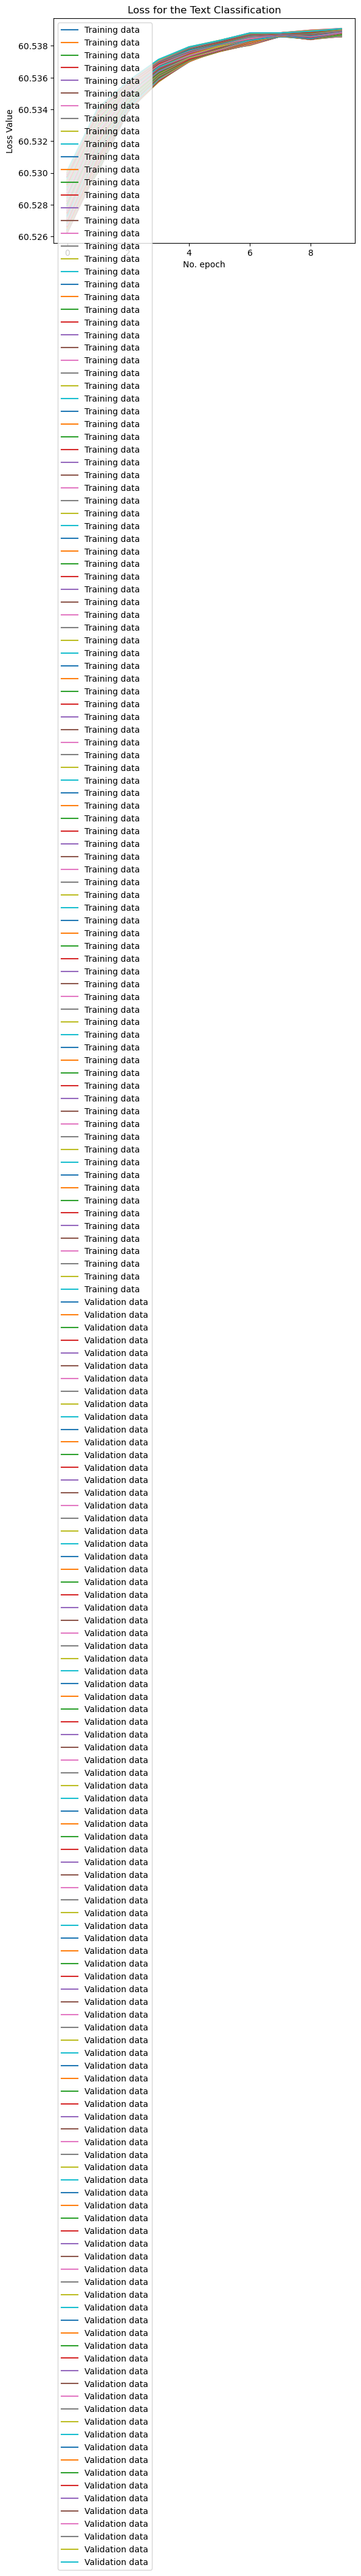

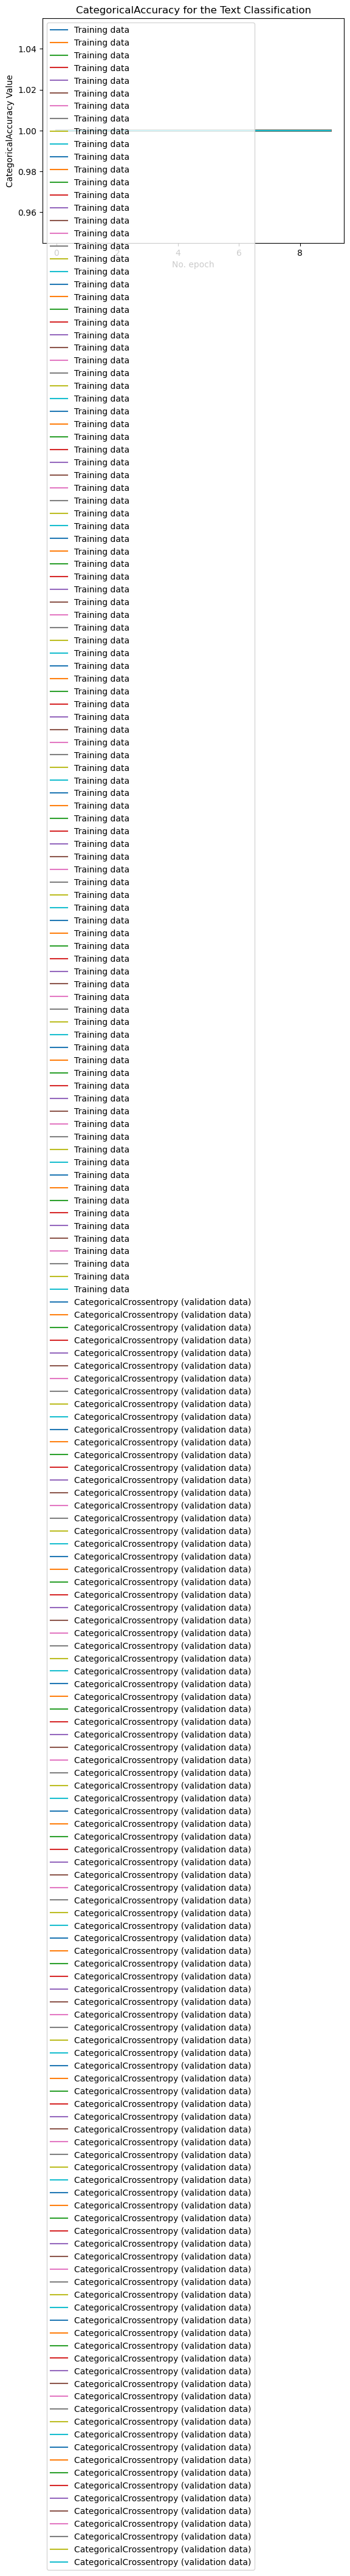

--------------------------------------------------
Test with Hidden data
--------------------------------------------------
88/88 [==============================] - 0s 1ms/step - loss: 60.5391 - categorical_accuracy: 1.0000
Test Score: 60.53907012939453
Test Accuracy: 1.0


In [201]:
DLModel(model, X_train_, y_train_, X_test_hidden_, y_test_hidden_)

## LSTM

In [205]:
model = Sequential()
embedding_layer = tf.keras.layers.Embedding(4536, 100, weights=[embedding_matrix], input_length=128 , trainable=False)
model.add(embedding_layer)
model.add(LSTM(32))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['CategoricalAccuracy'])

Epoch 1/100
53/53 [==============================] - 2s 39ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 2/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 3/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 4/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 5/100
53/53 [==============================] - 2s 33ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 6/100
53/53 [==============================] - 2s 33ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.

Epoch 44/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 45/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 46/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 47/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 48/100
53/53 [==============================] - 2s 32ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 49/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_lo

Epoch 91/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 92/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 93/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 94/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 95/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 96/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_lo

53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 38/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 39/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 40/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 41/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 42/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+0

Epoch 84/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 85/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 86/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 87/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 88/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 89/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_lo

53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 31/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 32/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 33/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 34/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 35/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+0

Epoch 77/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 78/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 79/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 80/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 81/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 82/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_lo

53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 24/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 25/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 26/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 27/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 28/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+0

Epoch 70/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 71/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 72/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 73/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 74/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 75/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_lo

53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 17/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 18/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 19/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 20/100
53/53 [==============================] - 2s 29ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 21/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+0

Epoch 63/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 64/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 65/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 66/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 67/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 68/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_lo

53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 10/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 11/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 12/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 13/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 14/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+0

Epoch 56/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 57/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 58/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 59/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 60/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 61/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_lo

53/53 [==============================] - 2s 29ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 3/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 4/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 5/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 6/100
53/53 [==============================] - 2s 29ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 7/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - v

Epoch 49/100
53/53 [==============================] - 2s 34ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 50/100
53/53 [==============================] - 2s 33ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 51/100
53/53 [==============================] - 2s 33ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 52/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 53/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 54/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_lo

Epoch 96/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 97/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 98/100
53/53 [==============================] - 2s 29ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 99/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 100/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
--------------------------------------------------
Epoch 1/100
53/53 [==============================] - 2s 33ms/step - loss:

53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 43/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 44/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 45/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 46/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 47/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+0

Epoch 89/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 90/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 91/100
53/53 [==============================] - 2s 32ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 92/100
53/53 [==============================] - 2s 32ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 93/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 94/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_lo

53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 36/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 37/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 38/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 39/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 40/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+0

Epoch 82/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 83/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 84/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 85/100
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 86/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 87/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_lo

53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 29/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 30/100
53/53 [==============================] - 2s 34ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 31/100
53/53 [==============================] - 2s 36ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 32/100
53/53 [==============================] - 2s 40ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 33/100
53/53 [==============================] - 2s 40ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+0

Epoch 75/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 76/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 77/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 78/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 79/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 80/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_lo

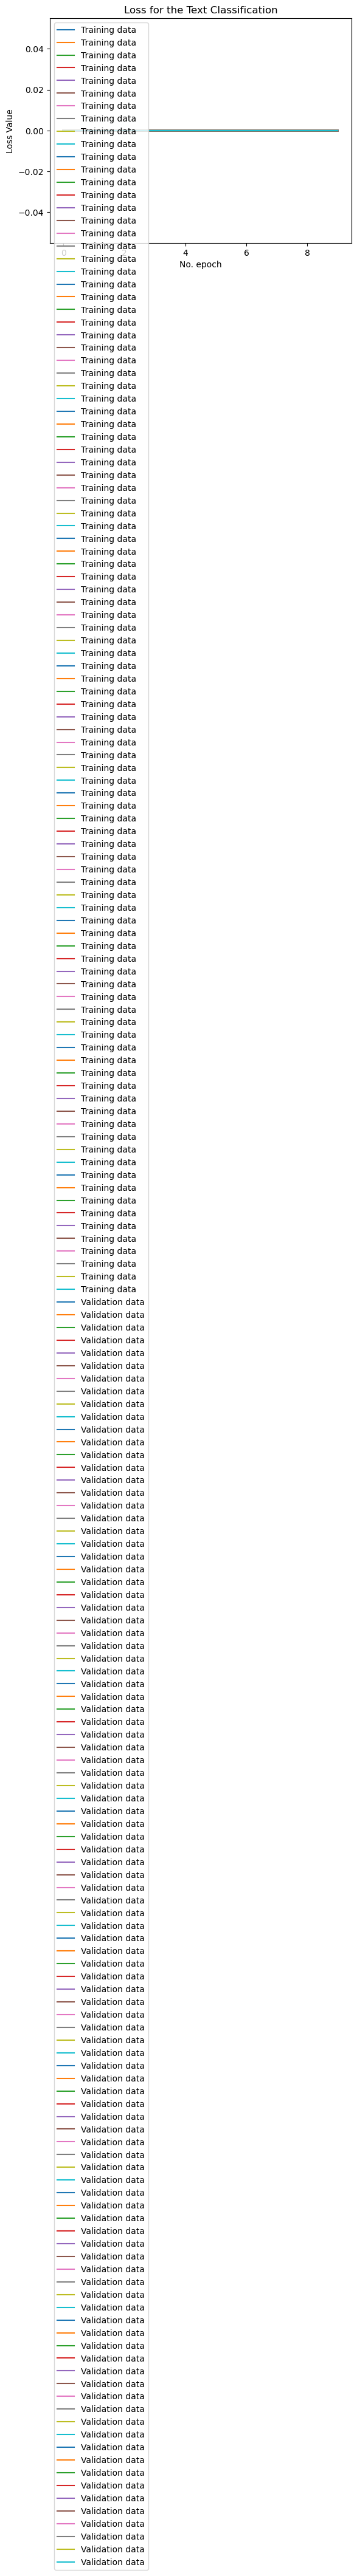

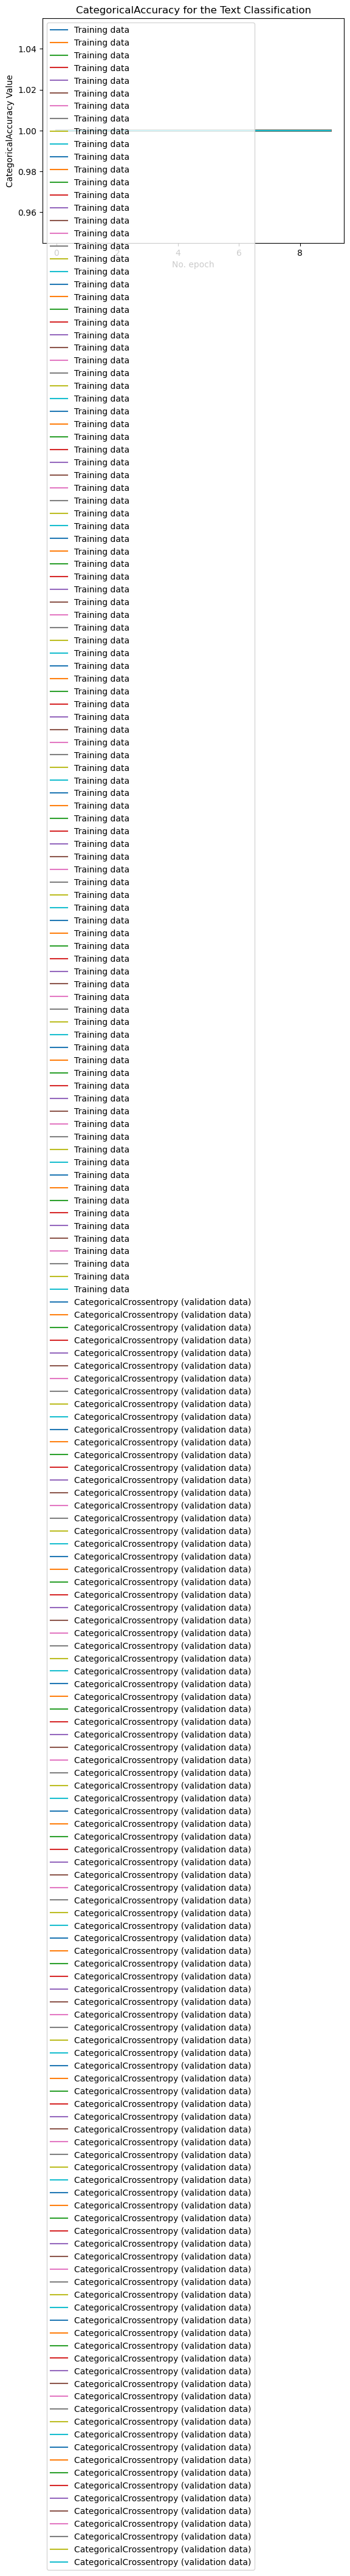

--------------------------------------------------
Test with Hidden data
--------------------------------------------------
88/88 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Test Score: 0.0
Test Accuracy: 1.0


In [206]:
DLModel(model, X_train_, y_train_, X_test_hidden_, y_test_hidden_)